# DeepLabCut Toolbox
https://github.com/AlexEMG/DeepLabCut

This notebook demonstrates the necessary steps to use DeepLabCut

Note: You can change the .ymal file to customrize your own setting and features.



## Create a new project

It is always good idea to keep the projects seperate. This function creates a new project with subdirectories and a basic configuration file in the user defined directory otherwise the project is created in the current working directory.

You can always add new videos to the project at any stage of the project. 

### NOTE: USE PYTHON 3.6 AND REMEMBER TO CONDA INSTALL JUPYTER TO RUN INSIDE PARTICULAR ENVIRONMENT

In [1]:
import deeplabcut

Change to your own working directory

In [2]:
import os
os.chdir('/home/donghan/DeepLabCut/data')

Rotate all the behavior video in order to conveniently annotate 

In [3]:
import numpy as np
import cv2
import glob
os.chdir("/home/donghan/DeepLabCut/data") 
#Working directory that stores video data
def rotate(image, angle, center=None, scale=1): 
    #scale = 1: original size
    rows,cols,ch = image.shape
    if center == None:
        center = (cols / 2, rows / 2)
    M = cv2.getRotationMatrix2D(center, angle, scale) 
    #Matrix: Rotate with center by angles
    dst = cv2.warpAffine(image,M,(cols,rows)) 
    #After rotation
    return dst


def videorotate(filename, output_name, display_video = False):
    # capture video
    cap = cv2.VideoCapture(filename)

    #read video frame by frame
    #extract original video frame features
    sz = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
            int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

    fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))

    fps = int(cap.get(cv2.CAP_PROP_FPS))

    #Make a directory to store the rotated videos
    path = "./rotated"
    try:  
        os.mkdir(path)
    except OSError:  
        pass
    else:  
        print ("Successfully created the directory %s " % path)
        
    #Automatically name the rotated videos  
    file = "./rotated/" + output_name
    out = cv2.VideoWriter(file, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), fps, sz) 
    #Integrate all frames to video

    
    #Read videos and rotate by certain degrees
    while(cap.isOpened()):
        #flip for truning(fliping) frames of video
        ret,img = cap.read()
        try:
            img2 = rotate(img, -4.5) 
            #Flipped Vertically
            out.write(img2)
            if display_video == True:
                cv2.imshow('rotated video',img2) 

            k=cv2.waitKey(30) & 0xff
            #once you inter Esc capturing will stop
            if k==27:
                break
        except:
            print (filename, 'successfully rotated!!!' )
            break
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    
    
# #Generate all rotating videos    
# filenames = glob.glob('*.mp4') #Return the file name with .mp4 extention 
# for i in filenames:
#     videorotate(i,os.path.splitext(i)[0] + " rotated.mp4")

### Extract all mp4 files from rotated videos folder

In [ ]:
#Extract mp4 files from video folder
from os import listdir
from os.path import isfile, join
cwd = os.chdir("./rotated") 
#we are using rotated videos
cwd = os.getcwd()
mp4files = [f for f in listdir(cwd) if isfile(join(cwd, f)) and os.path.splitext(f)[1] == ".mp4"]
#Get all mp4 files

### Starting a new project

Note that if there is an existing folder, depends on the situation, you can either delete it or find an alternative new name.

In [3]:
os.chdir("./rotated")

In [5]:
task='Reaching' # Enter the name of your experiment Task
experimenter='Donghan' # Enter the name of the experimenter
video="1035 SI_A, Aug 15, 13 17 7 rotated.mp4" # Enter the paths of your videos you want to grab frames from.

path_config_file=deeplabcut.create_new_project(task,experimenter,video, working_directory='/home/donghan/DeepLabCut/data/rotated',copy_videos=True) 
#change the working directory to where you want the folders created.


# The function returns the path, where your project is. 
# You could also enter this manually (e.g. if the project is already created and you want to pick up, where you stopped...)
#path_config_file = '/home/Mackenzie/Reaching/config.yaml' # Enter the path of the config file that was just created from the above step (check the folder)

Created "/home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/videos"
Created "/home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/labeled-data"
Created "/home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/training-datasets"
Created "/home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/dlc-models"
Copying the videos
/home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/videos/1035 SI_A, Aug 15, 13 17 7 rotated.mp4
Generated "/home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/config.yaml"

A new project with name Reaching-Donghan-2019-06-19 is created at /home/donghan/DeepLabCut/data/rotated and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt to your project's needs.
 Once you have changed the configuration file, use the function 'extract_frames' to select frames for labeling.
. [OPTIONAL] Use the function 'add_new_videos' to add new videos to your project (at 

## Extract frames from videos 
A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) (algo=='uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling.

In [6]:
path_config_file = "/home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/config.yaml"

In [7]:
%matplotlib inline
deeplabcut.extract_frames(path_config_file,algo='kmeans',crop=False, userfeedback=False) #there are other ways to grab frames, such as by clustering 'kmeans'; please see the paper. 
#You can change the cropping to false, then delete the checkcropping part!
#userfeedback: ask if users would like to continue or stop

61it [00:00, 603.27it/s]

Config file read successfully.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 161.05  seconds.
Extracting and downsampling... 3221  frames from the video.


3221it [00:04, 688.28it/s]


Kmeans clustering ... (this might take a while)

Frames were selected.
You can now label the frames using the function 'label_frames' (if you extracted enough frames for all videos).


## Label the extracted frames
### Remember to change the config.yaml, head and tail, size = 5
Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [8]:
%matplotlib notebook
%gui wx
deeplabcut.label_frames(path_config_file)

You can now check the labels, using 'check_labels' before proceeding. Then, you can use the function 'create_training_dataset' to create the training dataset.


**Check the labels**

Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. The DeepLabCut toolbox provides a function `check\_labels'  to do so. It is used as follows:

Creating images with labels by Donghan.


<IPython.core.display.Javascript object>


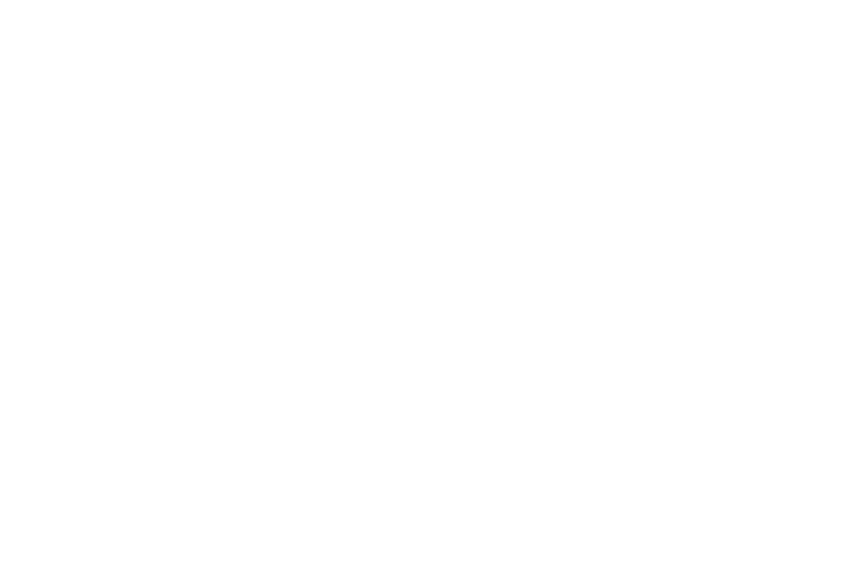

<IPython.core.display.Javascript object>


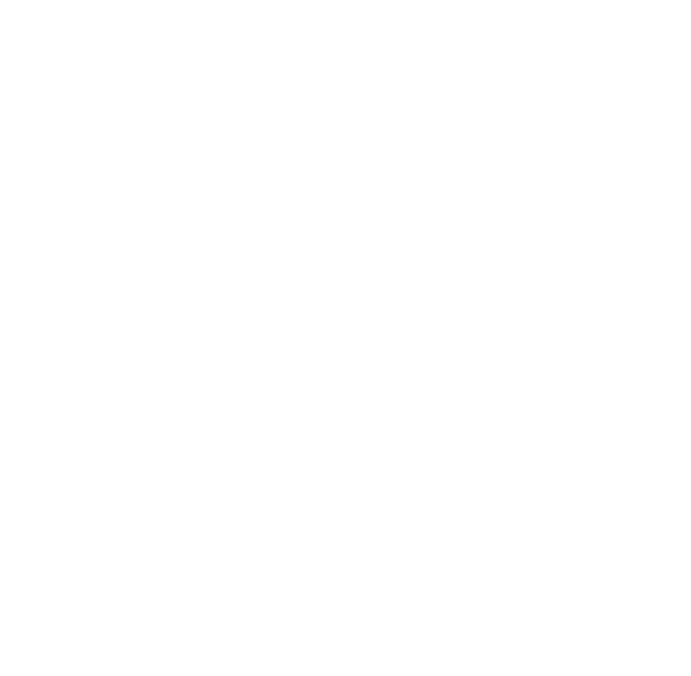

They are stored in the following folder: /home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/labeled-data/1035 SI_A, Aug 15, 13 17 7 rotated_labeled.


<IPython.core.display.Javascript object>


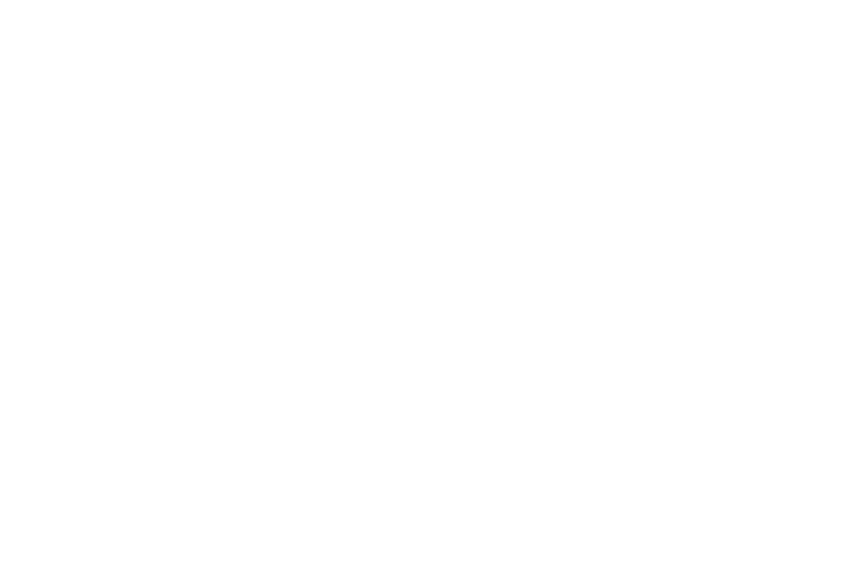

<IPython.core.display.Javascript object>


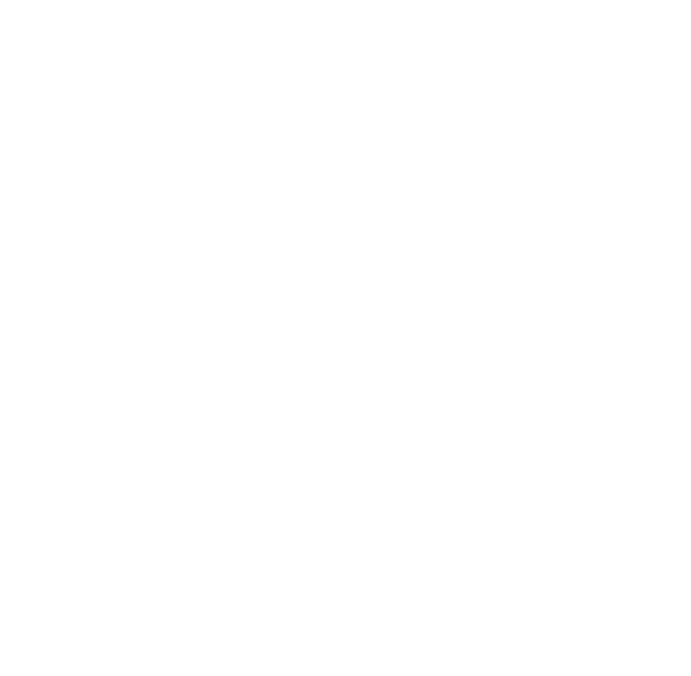

<IPython.core.display.Javascript object>


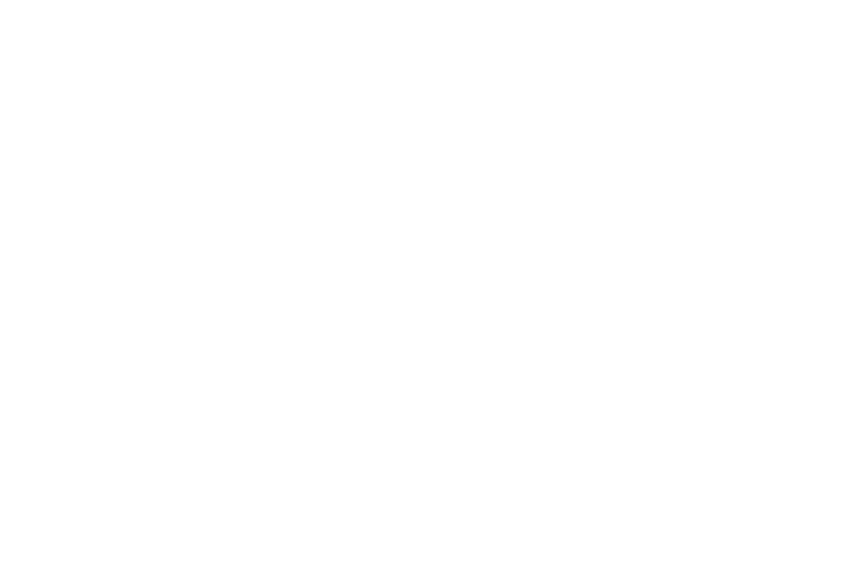

<IPython.core.display.Javascript object>


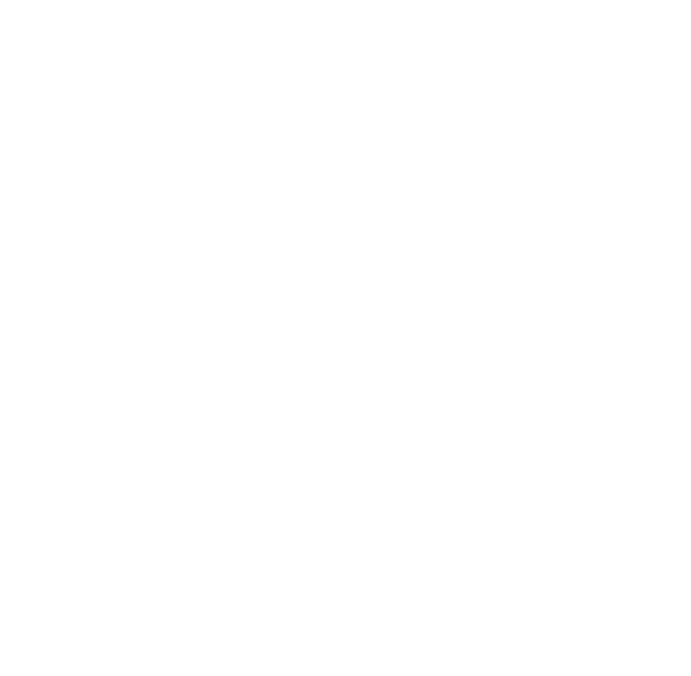

<IPython.core.display.Javascript object>


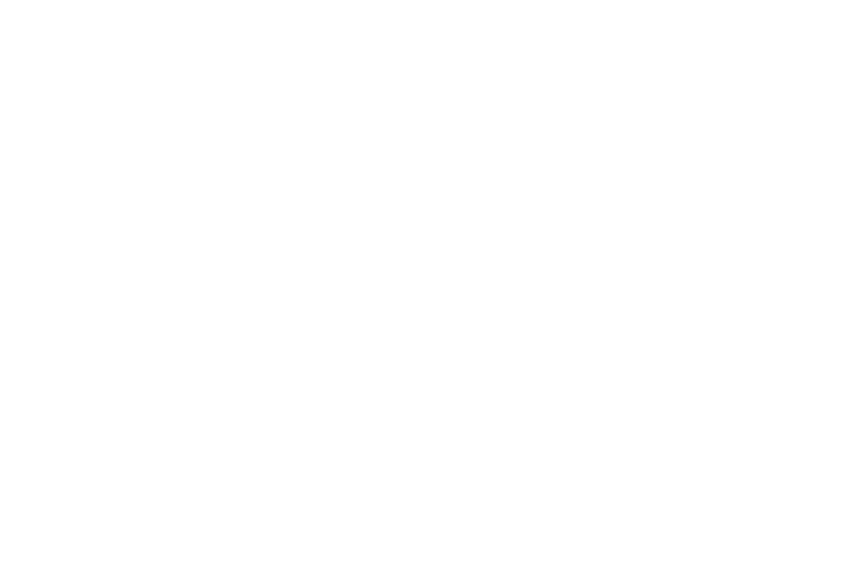

<IPython.core.display.Javascript object>


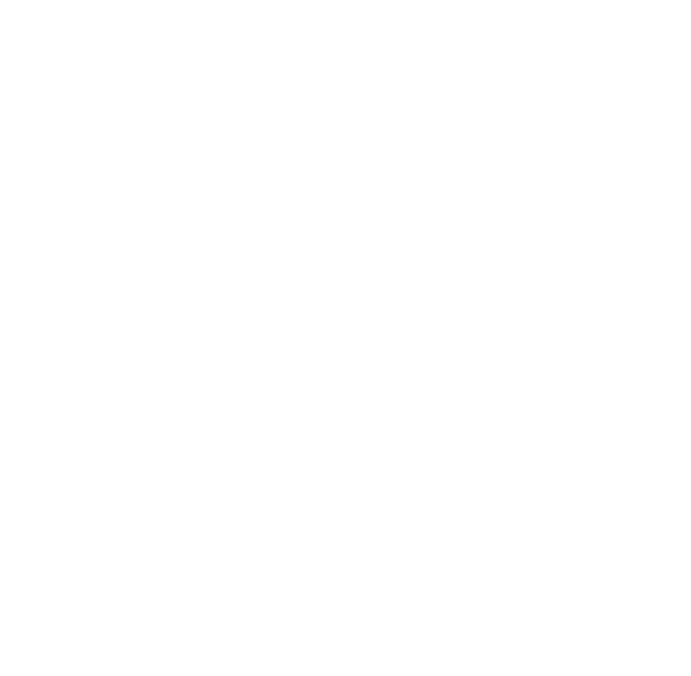

<IPython.core.display.Javascript object>


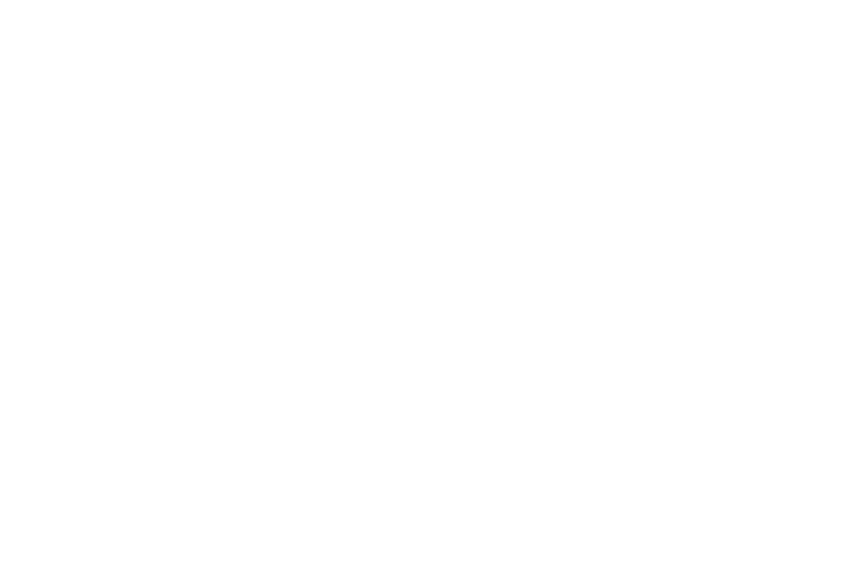

<IPython.core.display.Javascript object>


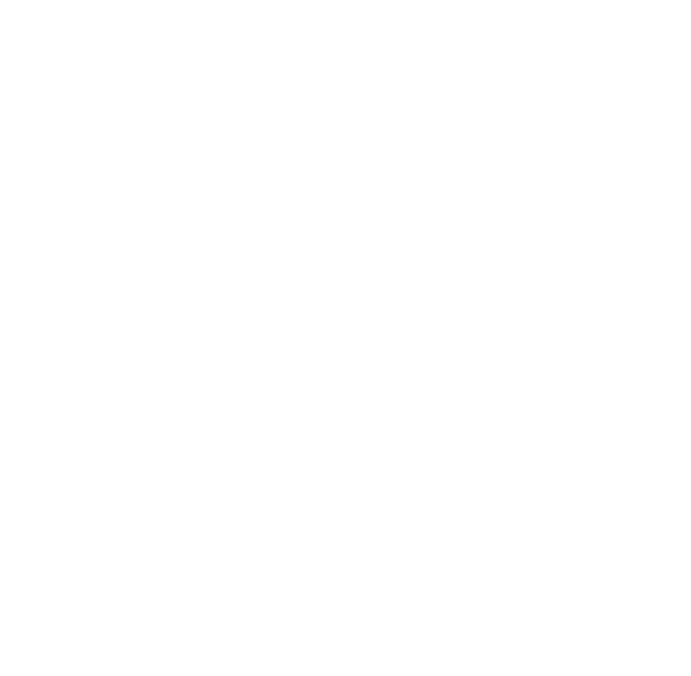

<IPython.core.display.Javascript object>


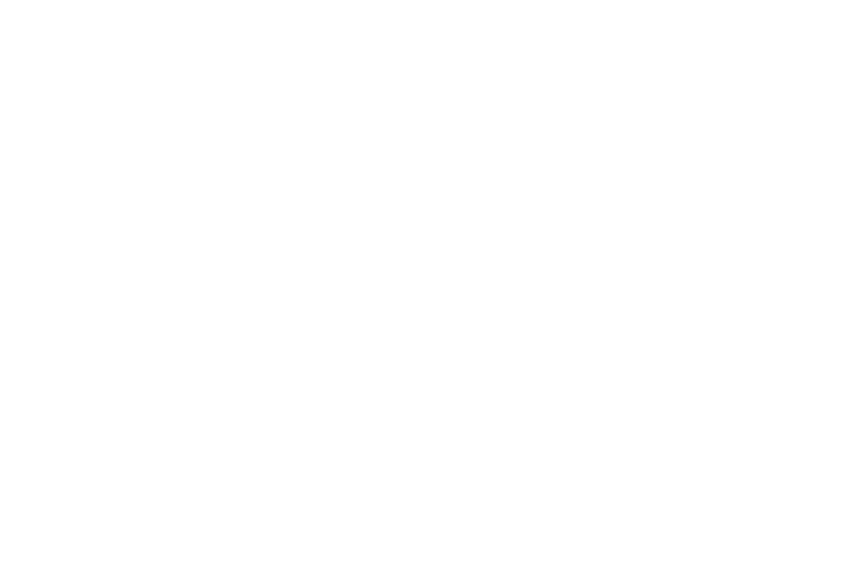

<IPython.core.display.Javascript object>


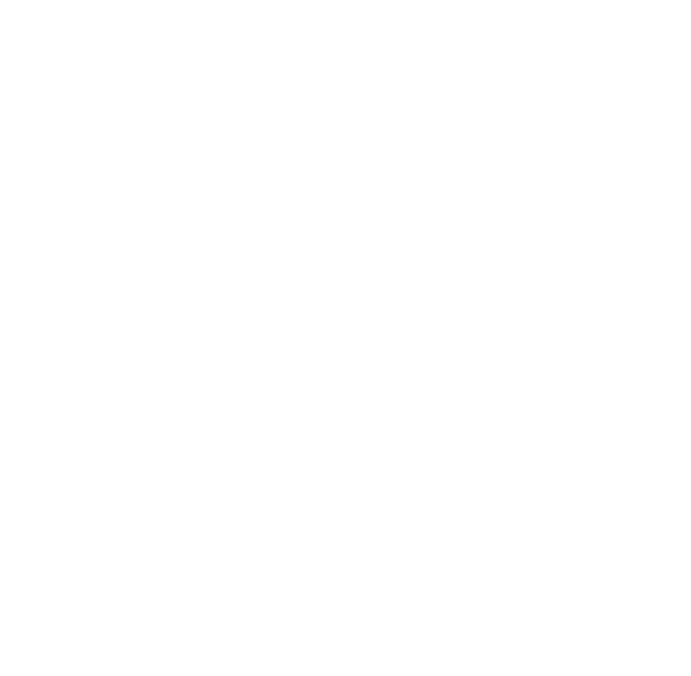

<IPython.core.display.Javascript object>


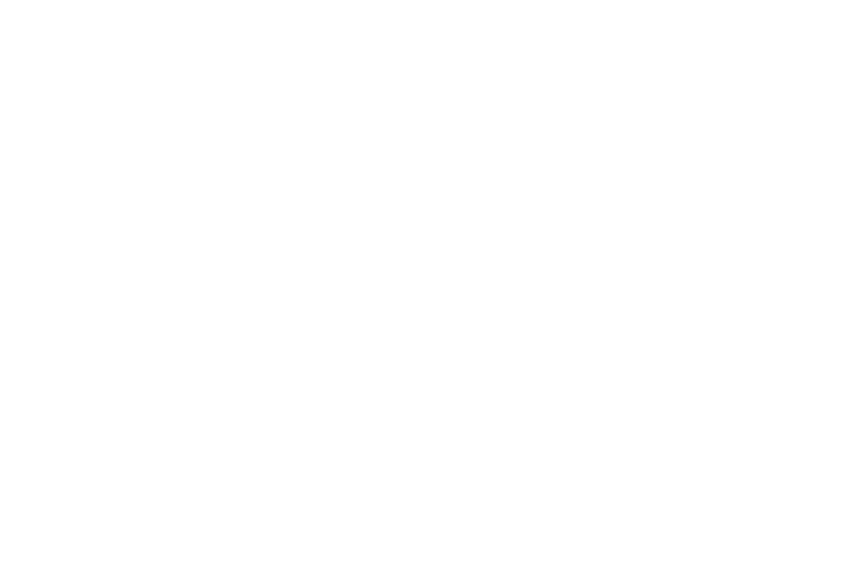

<IPython.core.display.Javascript object>


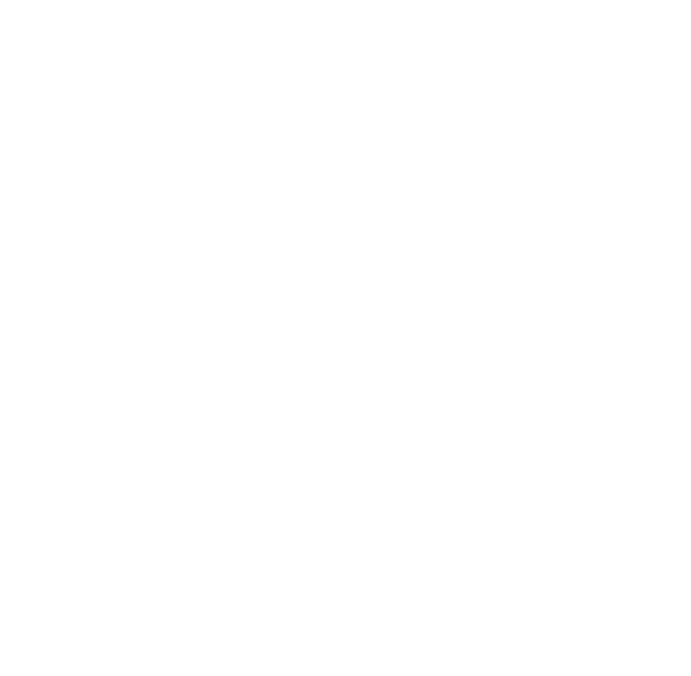

<IPython.core.display.Javascript object>


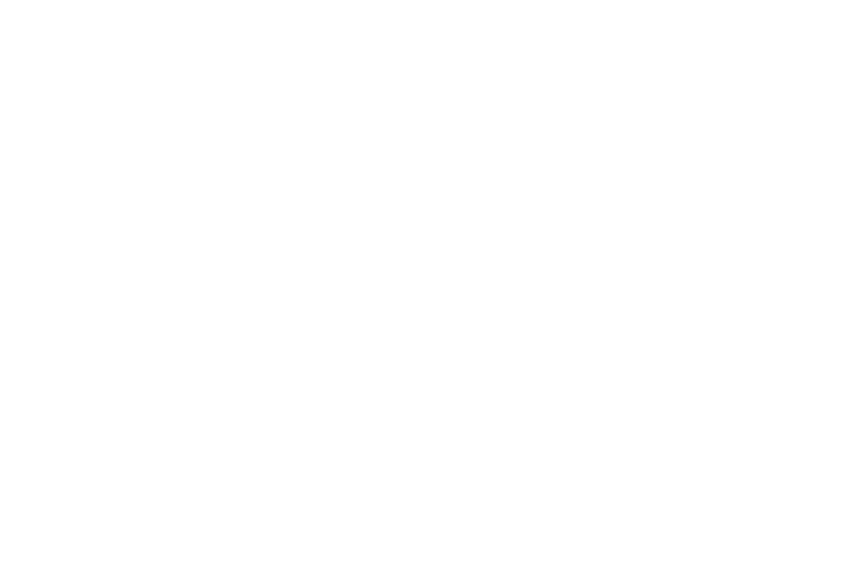

<IPython.core.display.Javascript object>


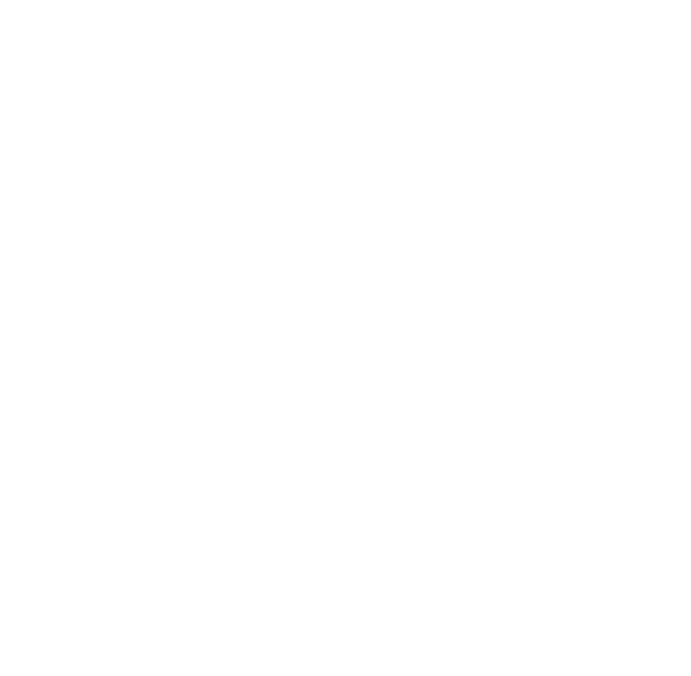

<IPython.core.display.Javascript object>


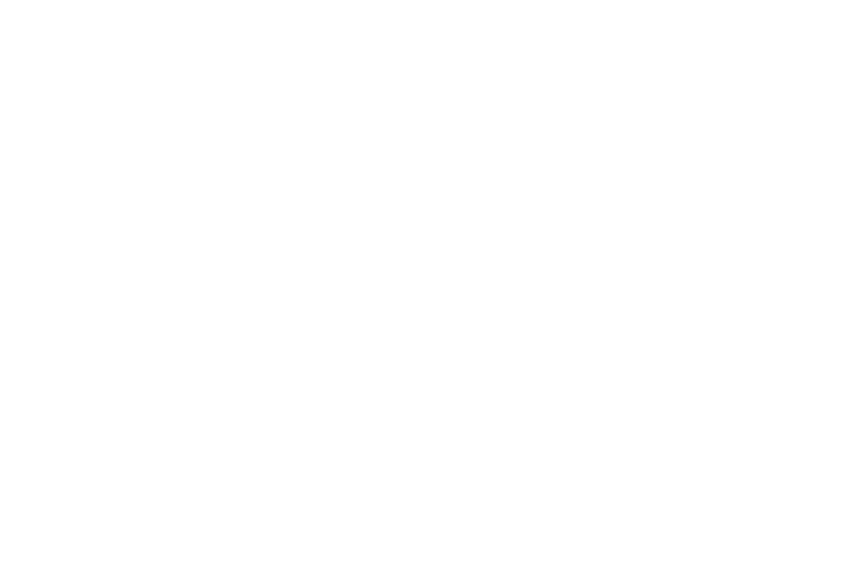

<IPython.core.display.Javascript object>


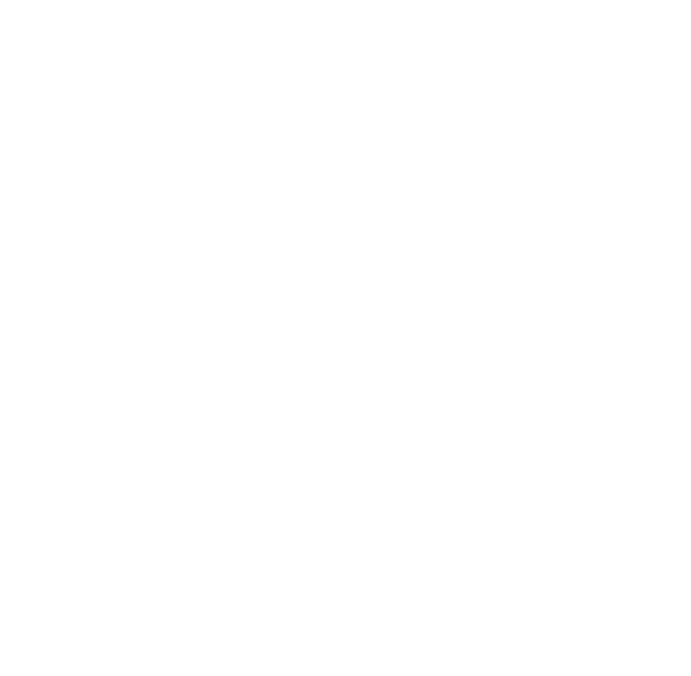

<IPython.core.display.Javascript object>


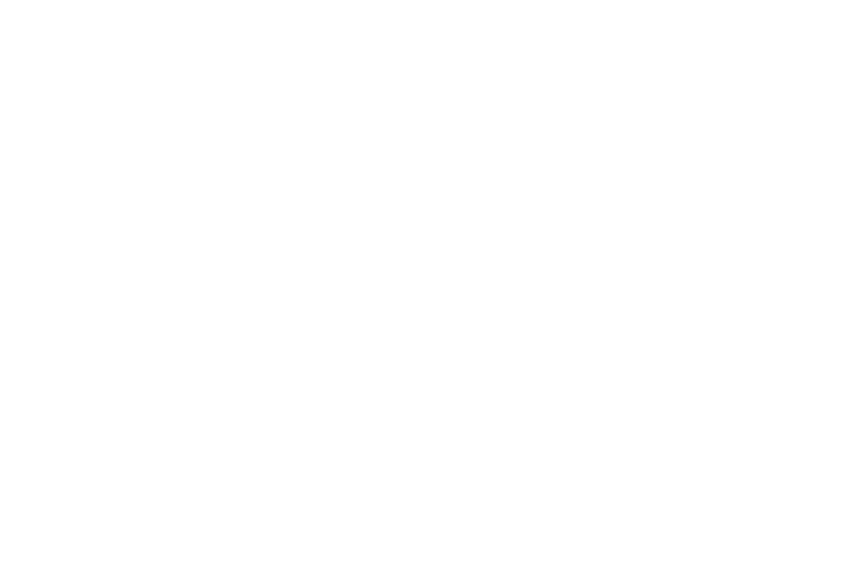

<IPython.core.display.Javascript object>


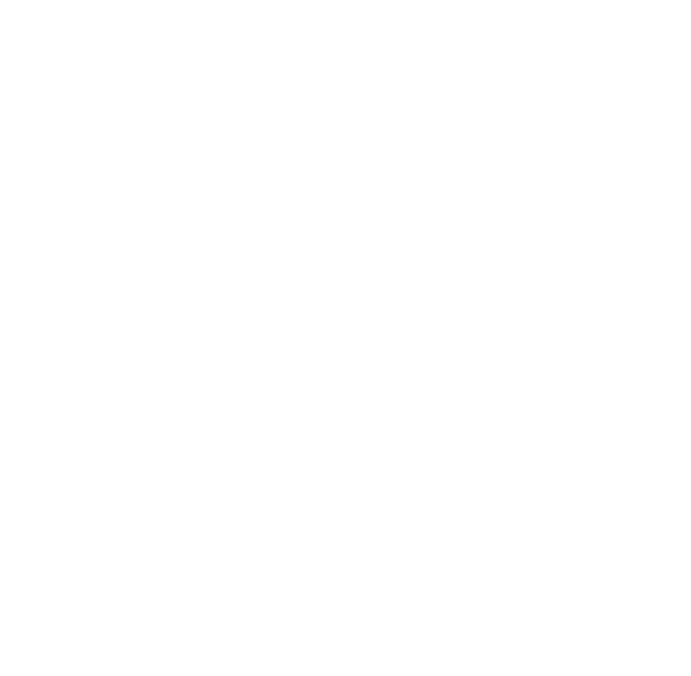

<IPython.core.display.Javascript object>


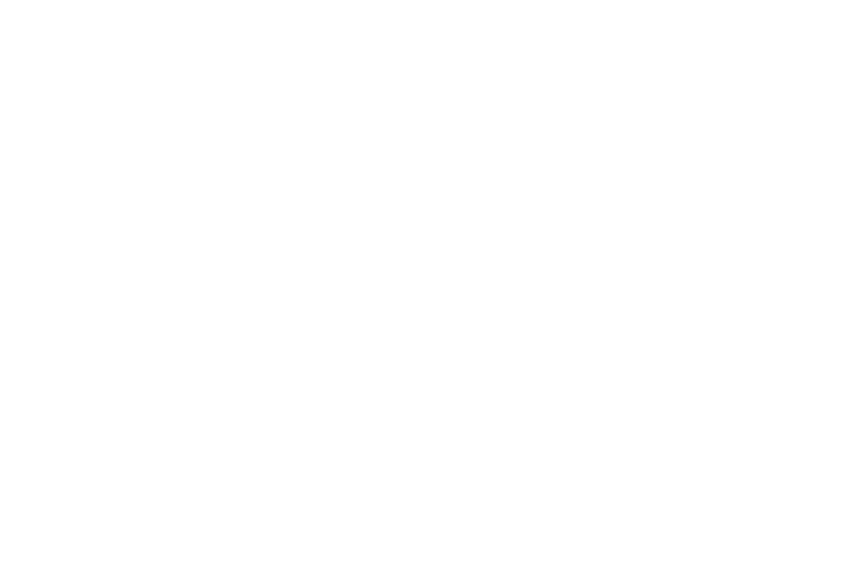

<IPython.core.display.Javascript object>


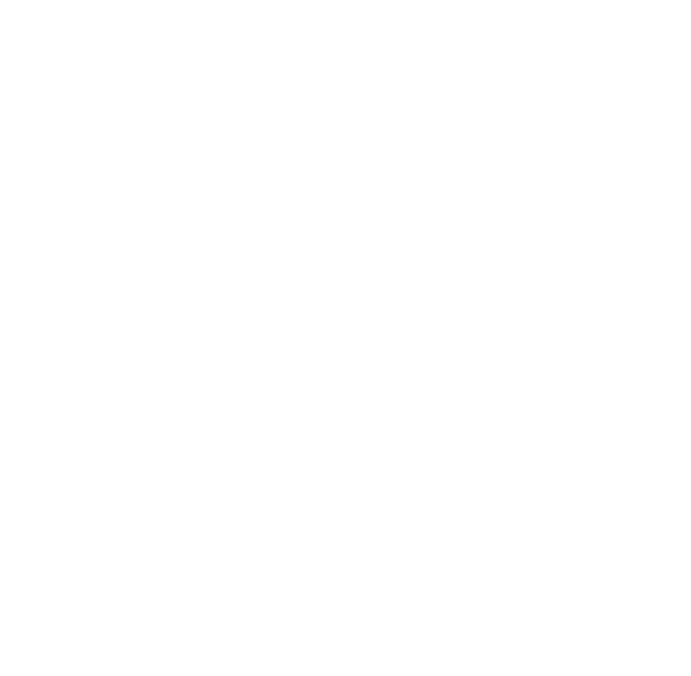

<IPython.core.display.Javascript object>


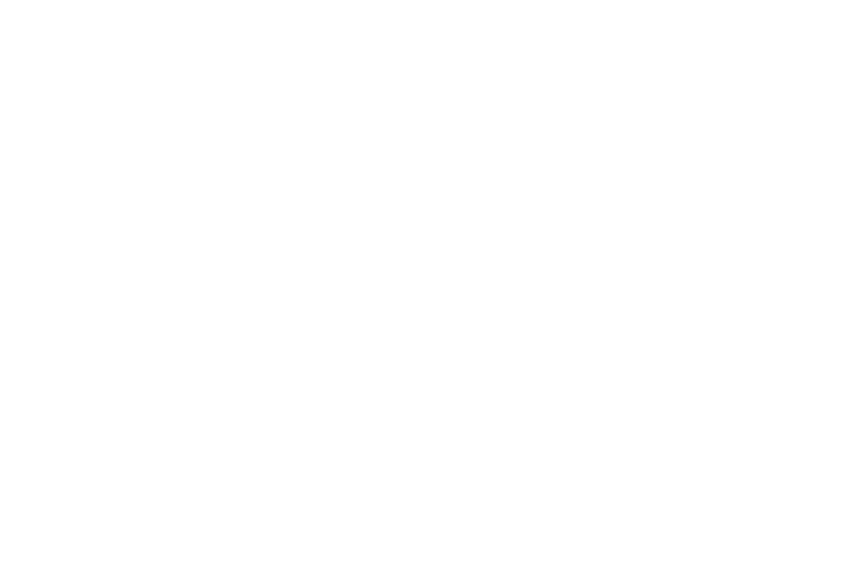

<IPython.core.display.Javascript object>


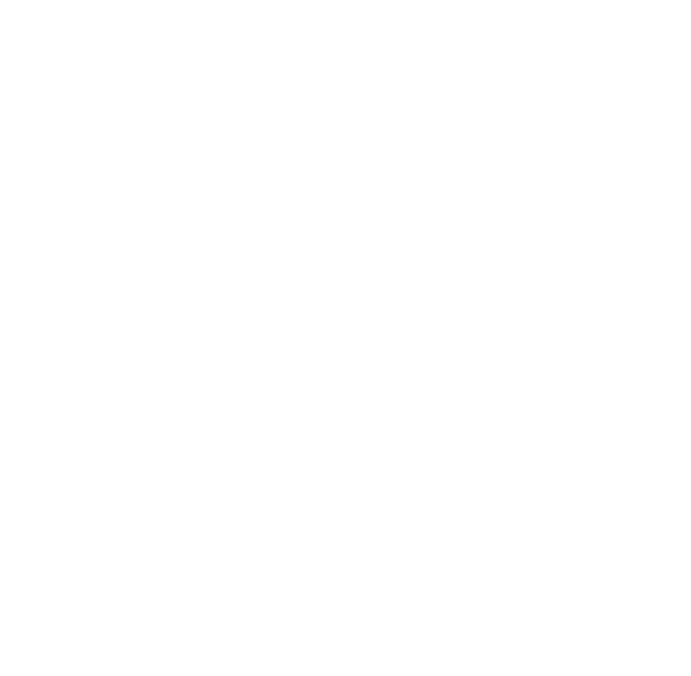

<IPython.core.display.Javascript object>


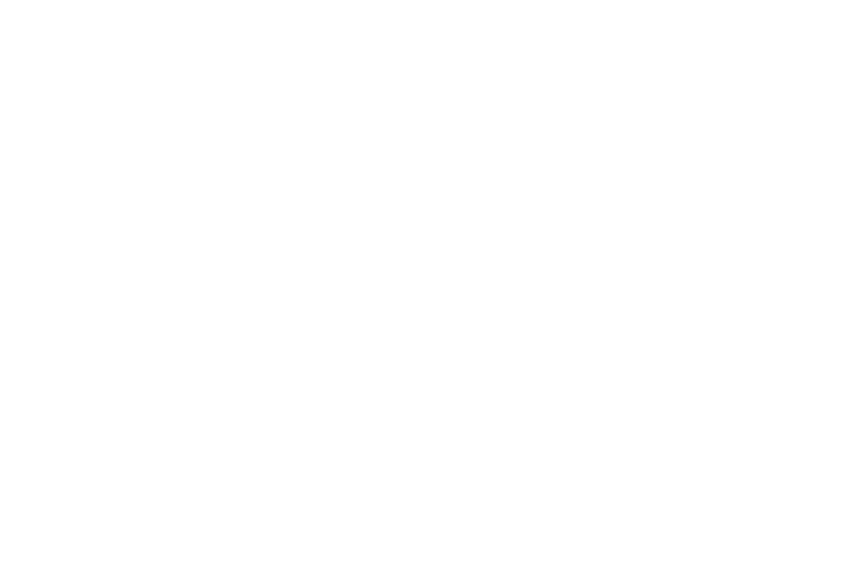

<IPython.core.display.Javascript object>


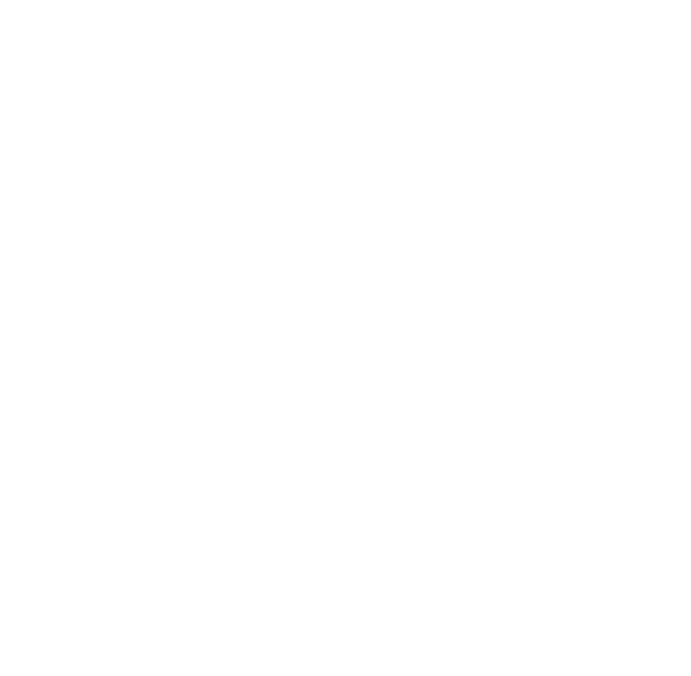

<IPython.core.display.Javascript object>


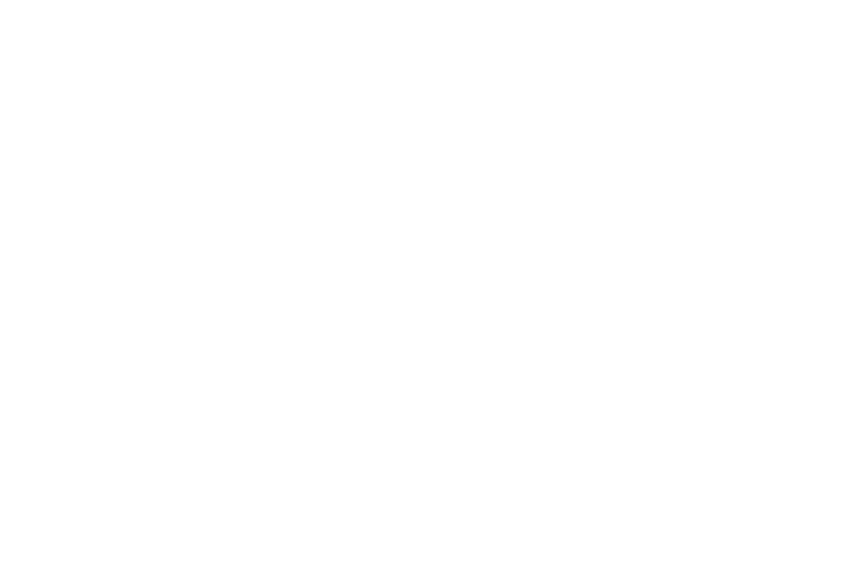

<IPython.core.display.Javascript object>


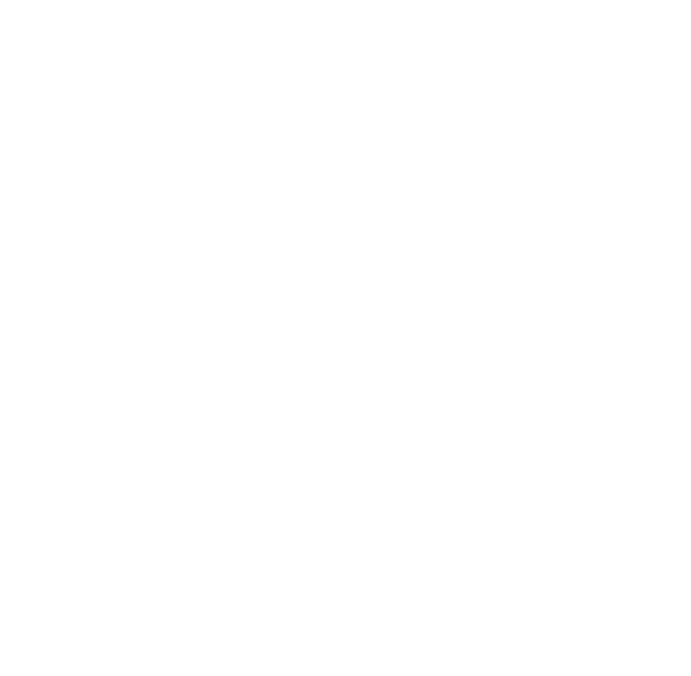

<IPython.core.display.Javascript object>


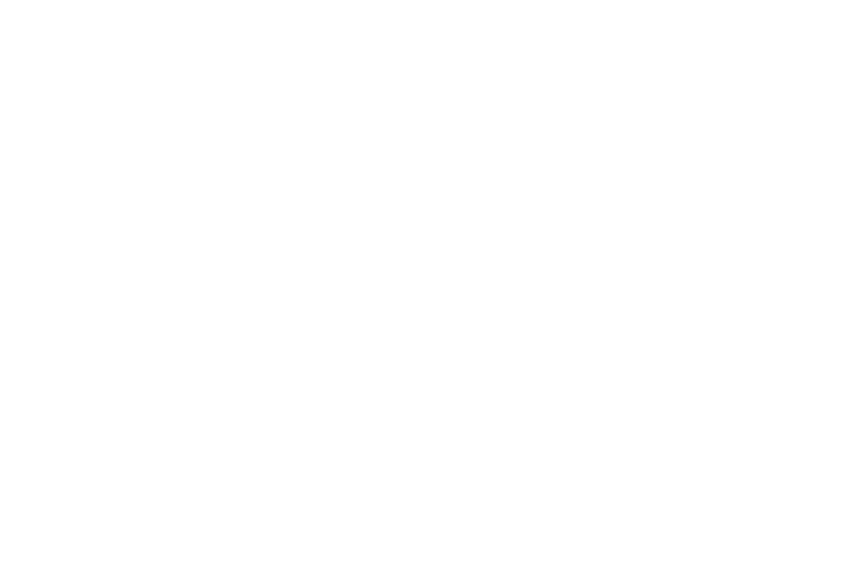

<IPython.core.display.Javascript object>


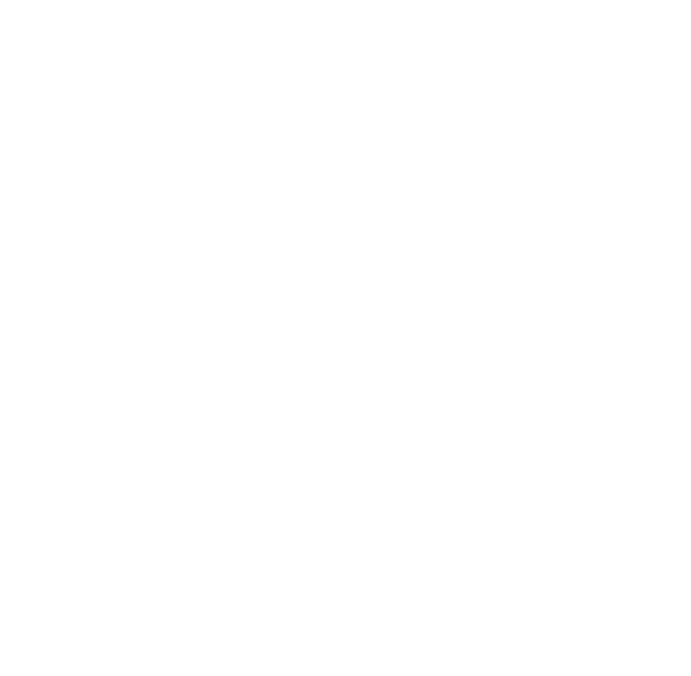

<IPython.core.display.Javascript object>


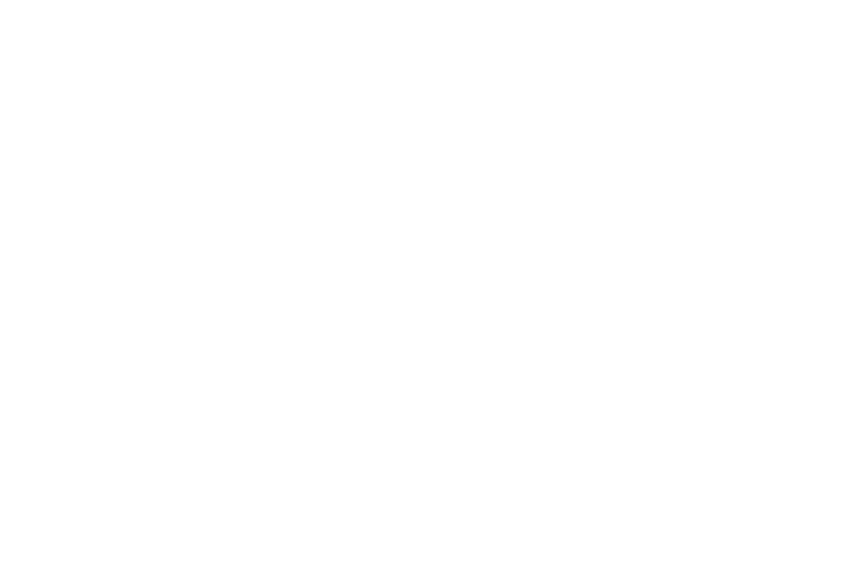

<IPython.core.display.Javascript object>


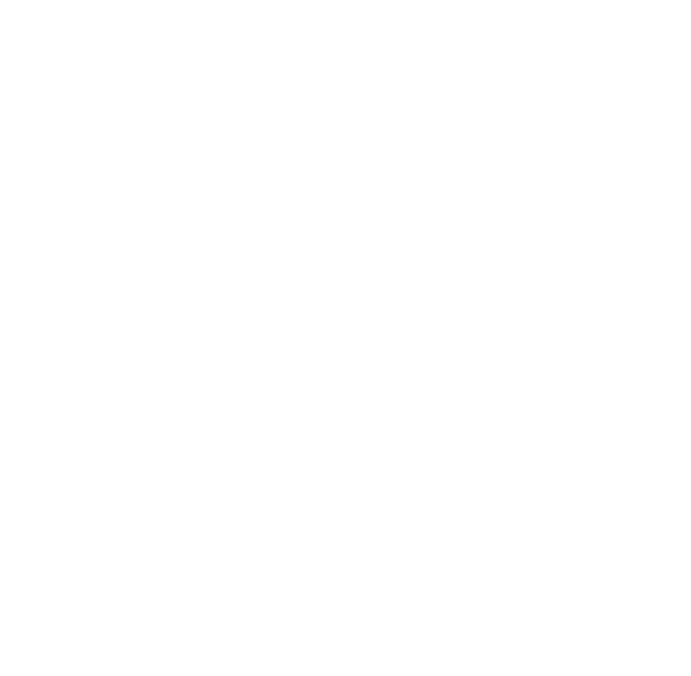

<IPython.core.display.Javascript object>


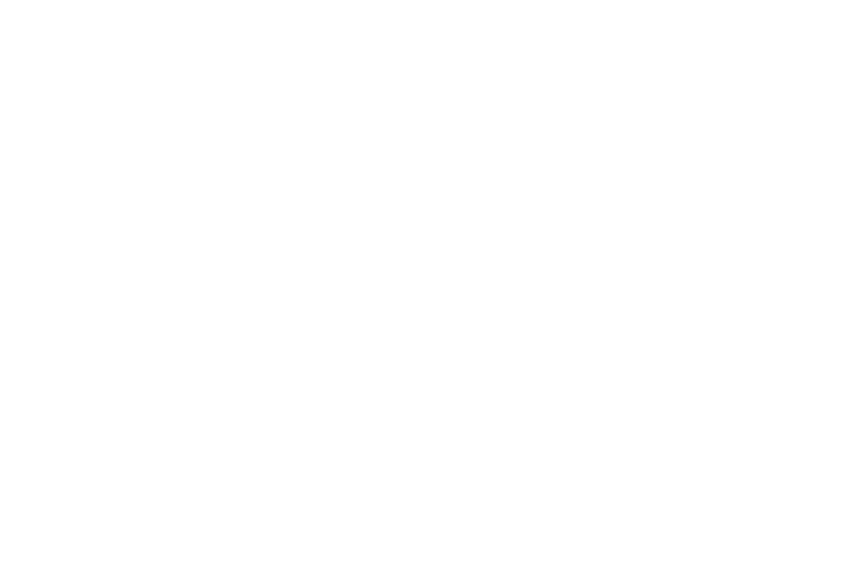

<IPython.core.display.Javascript object>


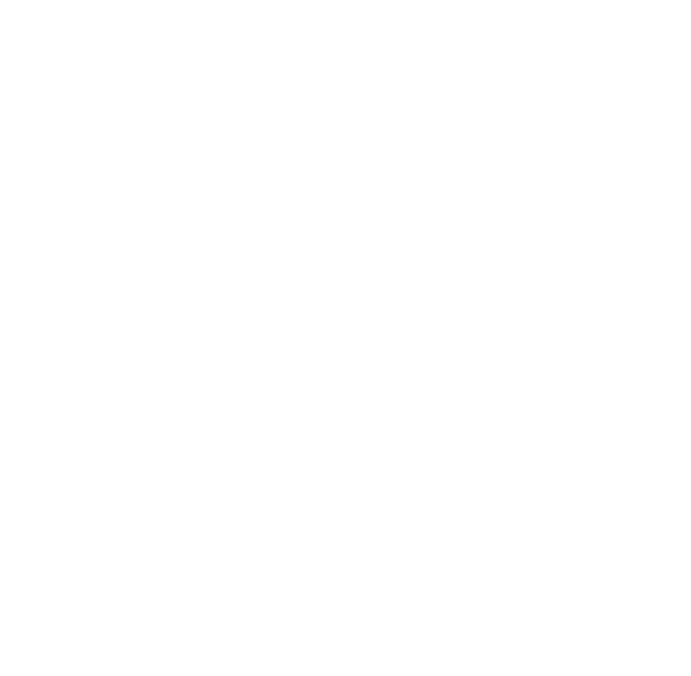

<IPython.core.display.Javascript object>


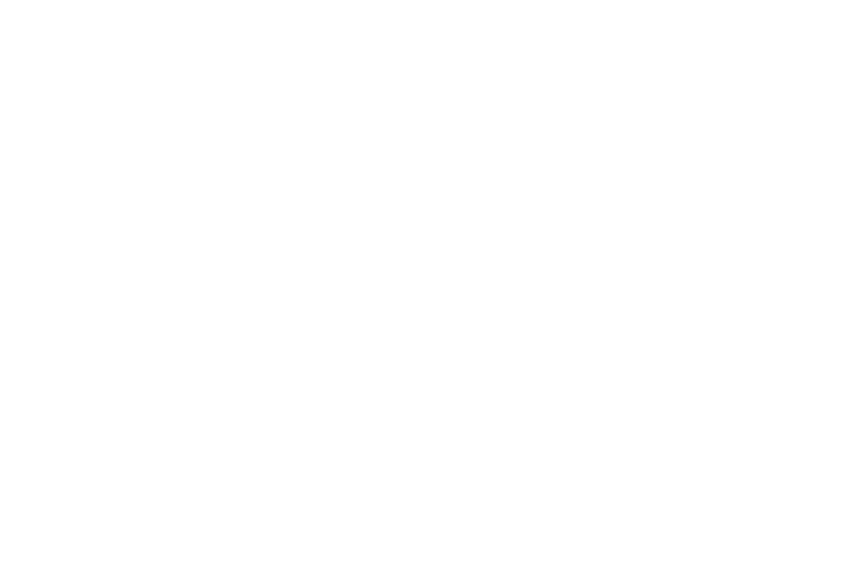

<IPython.core.display.Javascript object>


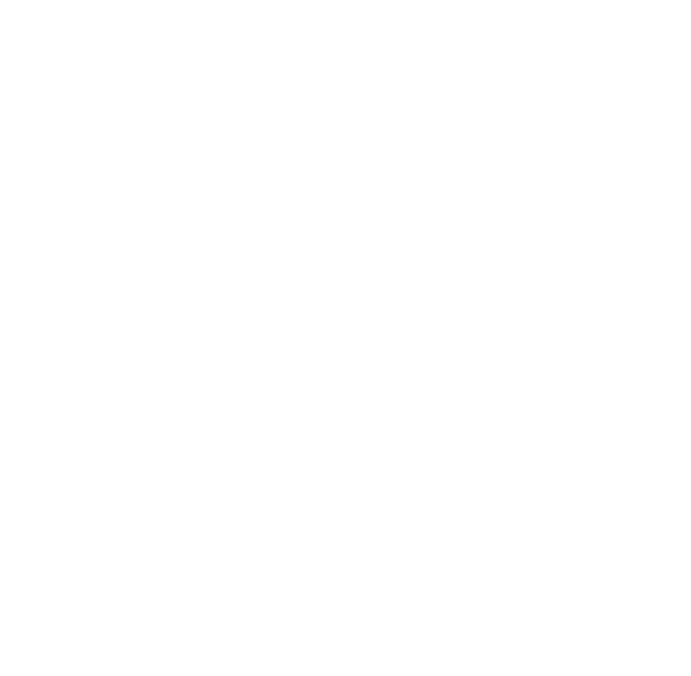

<IPython.core.display.Javascript object>


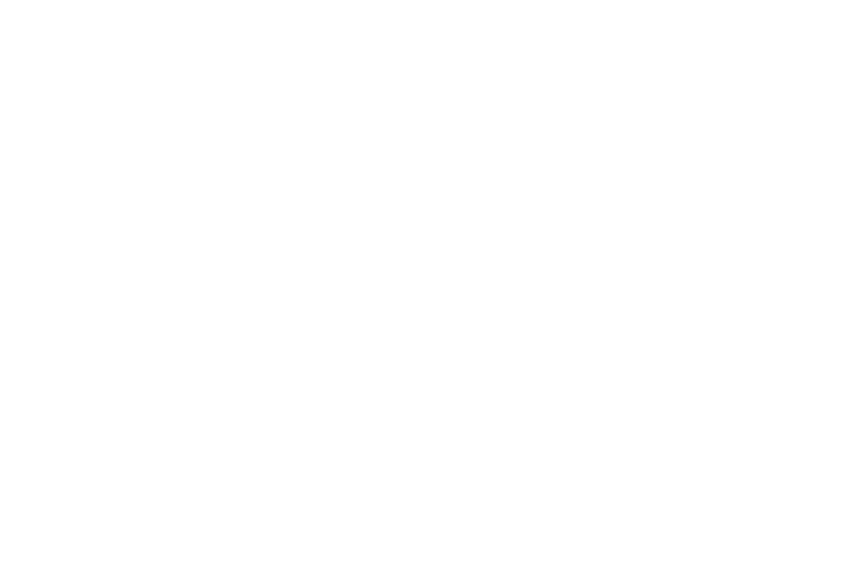

<IPython.core.display.Javascript object>


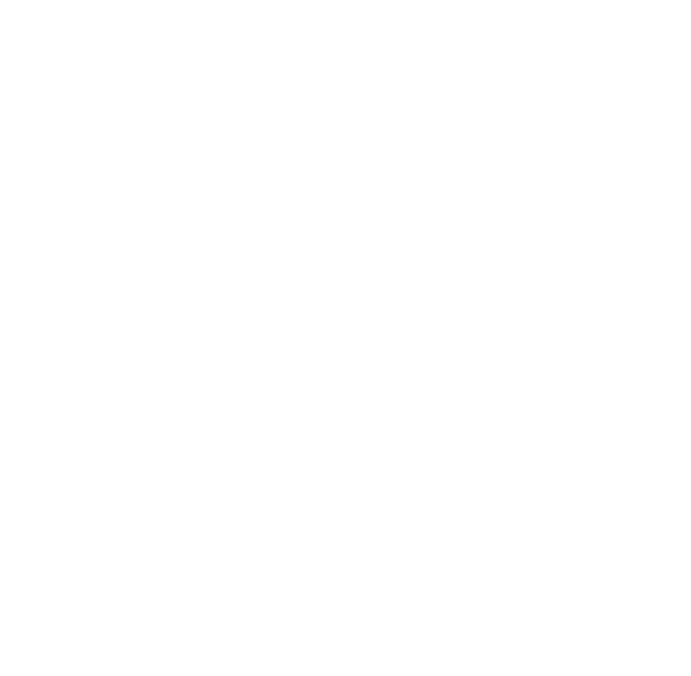

<IPython.core.display.Javascript object>


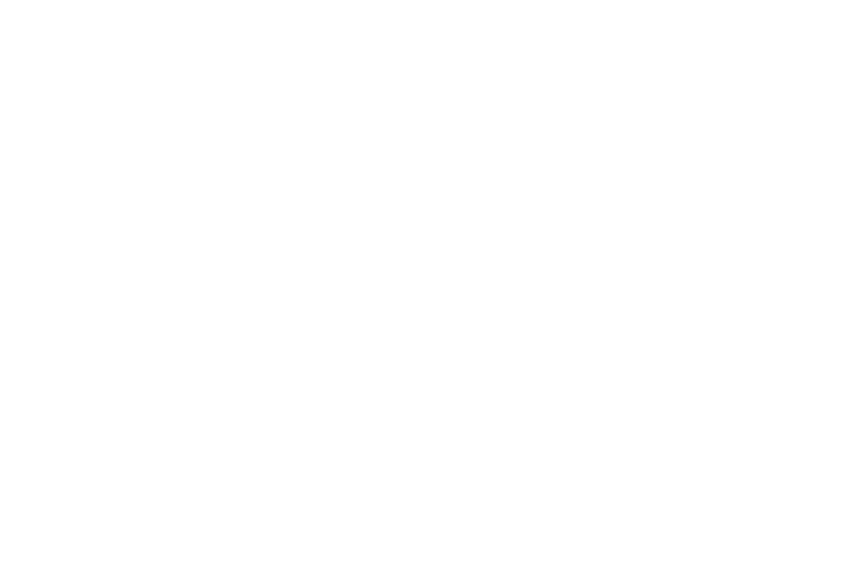

<IPython.core.display.Javascript object>


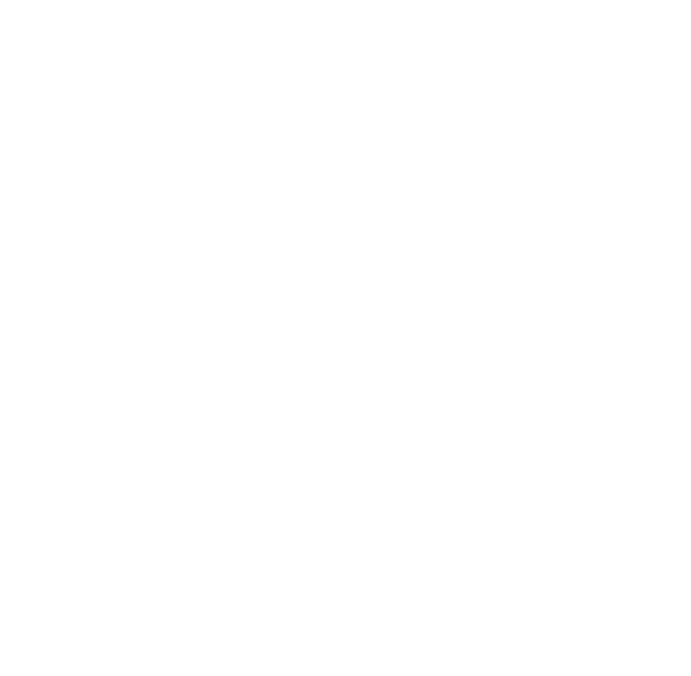

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [9]:
deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

If the labels need adjusted, you can use the refinement GUI to move them around! Check that out below.

## Create a training dataset
This function generates the training data information for DeepCut (which requires a mat file) based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles. 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**.

Now it is the time to start training the network!

In [10]:
deeplabcut.create_training_dataset(path_config_file)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


## Start training - If you want to use a CPU, continue. 
### If you want to use your GPU, you need to exit here and either work from the Docker container, your own TensorFlow installation in an Anaconda env

This function trains the network for a specific shuffle of the training dataset. 

In [7]:
deeplabcut.train_network(path_config_file, shuffle=1, saveiters=200, displayiters=10,autotune = True)
#Other parameters include trainingsetindex=0,gputouse=None,max_snapshots_to_keep=5,autotune=False,maxiters=None
#Detailed function explanation can be found here https://github.com/AlexEMG/DeepLabCut/blob/efa95129061b1ba1535f7361fe76e9267568a156/deeplabcut/pose_estimation_tensorflow/training.py

Config:
{'all_joints': [[0], [1]],
 'all_joints_names': ['Hand', 'Tail'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-1/UnaugmentedDataSet_ReachingJun19/Reaching_Donghan95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/donghan/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-1/UnaugmentedDataSet_ReachingJun19/Documentation_data-Reaching_95shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror

INFO:tensorflow:Restoring parameters from /home/donghan/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt


Restoring parameters from /home/donghan/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt


Display_iters overwritten as 10
Save_iters overwritten as 200
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'weigh_only_present_joints': False, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/dlc-models/iteration-1/ReachingJun19-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'mirror': False, 'crop_pad': 0, 'scoremap_dir': 'test', 'dataset_type': 'default', 'use_gt_segm': False, 'batch_size': 1, 'video': False, 'video_batch': False, 'crop': True, 'cropratio': 0.4, 'minsize': 100, 'leftwidth': 400, 'rightwidth': 400, 'topheight': 400, 'bottomheight': 400,

iteration: 10 loss: 0.2190 lr: 0.005
iteration: 20 loss: 0.0554 lr: 0.005
iteration: 30 loss: 0.0368 lr: 0.005
iteration: 40 loss: 0.0345 lr: 0.005
iteration: 50 loss: 0.0288 lr: 0.005
iteration: 60 loss: 0.0291 lr: 0.005
iteration: 70 loss: 0.0316 lr: 0.005
iteration: 80 loss: 0.0281 lr: 0.005
iteration: 90 loss: 0.0255 lr: 0.005
iteration: 100 loss: 0.0284 lr: 0.005
iteration: 110 loss: 0.0270 lr: 0.005
iteration: 120 loss: 0.0282 lr: 0.005
iteration: 130 loss: 0.0236 lr: 0.005
iteration: 140 loss: 0.0235 lr: 0.005
iteration: 150 loss: 0.0242 lr: 0.005
iteration: 160 loss: 0.0252 lr: 0.005
iteration: 170 loss: 0.0291 lr: 0.005
iteration: 180 loss: 0.0222 lr: 0.005
iteration: 190 loss: 0.0245 lr: 0.005
iteration: 200 loss: 0.0222 lr: 0.005
iteration: 210 loss: 0.0235 lr: 0.005
iteration: 220 loss: 0.0216 lr: 0.005
iteration: 230 loss: 0.0182 lr: 0.005
iteration: 240 loss: 0.0190 lr: 0.005
iteration: 250 loss: 0.0214 lr: 0.005
iteration: 260 loss: 0.0196 lr: 0.005


KeyboardInterrupt: 

## Start evaluating
This funtion evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

In [8]:
deeplabcut.evaluate_network(path_config_file)

Config:
{'all_joints': [[0], [1]],
 'all_joints_names': ['Hand', 'Tail'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-1/UnaugmentedDataSet_ReachingJun19/Reaching_Donghan95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/donghan/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-1/UnaugmentedDataSet_ReachingJun19/Documentation_data-Reaching_95shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror

/home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/evaluation-results/  already exists!
Running  DeepCut_resnet50_ReachingJun19shuffle1_200  with # of trainingiterations: 200
INFO:tensorflow:Restoring parameters from /home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/dlc-models/iteration-1/ReachingJun19-trainset95shuffle1/train/snapshot-200


Restoring parameters from /home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/dlc-models/iteration-1/ReachingJun19-trainset95shuffle1/train/snapshot-200
0it [00:00, ?it/s]

Analyzing data...


80it [00:26,  3.49it/s]

Done and results stored for snapshot:  snapshot-200
Results for 200  training iterations: 95 1 train error: 20.43 pixels. Test error: 22.05  pixels.
With pcutoff of 0.1  train error: 20.43 pixels. Test error: 22.05 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
If it generalizes well, choose the best model for prediction and update the config file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise consider retraining the network (see DeepLabCut workflow Fig 2)


## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [9]:
videofile_path = ["1035 SI_A, Aug 15, 13 17 7 rotated.mp4"] #Enter the list of videos to analyze.
deeplabcut.analyze_videos(path_config_file,videofile_path)

Config:
{'all_joints': [[0], [1]],
 'all_joints_names': ['Hand', 'Tail'],
 'batch_size': 1,
 'bottomheight': 400,
 'crop': True,
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-1/UnaugmentedDataSet_ReachingJun19/Reaching_Donghan95shuffle1.mat',
 'dataset_type': 'default',
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/donghan/anaconda3/envs/deeplabcut/lib/python3.6/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'leftwidth': 400,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 0.05,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'max_input_size': 1500,
 'mean_pixel': [123.68, 116.779, 103.939],
 'metadataset': 'training-datasets/iteration-1/UnaugmentedDataSet_ReachingJun19/Documentation_data-Reaching_95shuffle1.pickle',
 'min_input_size': 64,
 'minsize': 100,
 'mirror

Using snapshot-200 for model /home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/dlc-models/iteration-1/ReachingJun19-trainset95shuffle1
INFO:tensorflow:Restoring parameters from /home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/dlc-models/iteration-1/ReachingJun19-trainset95shuffle1/train/snapshot-200


Restoring parameters from /home/donghan/DeepLabCut/data/rotated/Reaching-Donghan-2019-06-19/dlc-models/iteration-1/ReachingJun19-trainset95shuffle1/train/snapshot-200


Starting to analyze %  1035 SI_A, Aug 15, 13 17 7 rotated.mp4
Video already analyzed! ./1035 SI_A, Aug 15, 13 17 7 rotatedDeepCut_resnet50_ReachingJun19shuffle1_200.h5
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'.
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract any outlier frames!


## Extract outlier frames [optional step]
This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. Make sure to provide the correct value of the "iterations" as it will be used to create the unique directory where the extracted frames will be saved.

network parameters: DeepCut_resnet50_ReachingJun19shuffle1_200
Method  jump  found  782  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the paramters (start, stop, epsilon, comparisonbodyparts) or use a different method.
yes/noyes


5it [00:00, 47.27it/s]

Frames from video 1035 SI_A, Aug 15, 13 17 7 rotated  already extracted (more will be added)!
Loading video...
Duration of video [s]:  161.05 , recorded @  20.0 fps!
Overall # of frames:  3221 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 161.05  seconds.
Extracting and downsampling... 782  frames from the video.


782it [00:10, 72.75it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [2162, 2984, 204, 2607, 2470, 1845, 2751, 1573, 2491, 1734, 688, 430, 147, 1361, 543, 1624, 2207, 2635, 1986, 2941]


<IPython.core.display.Javascript object>


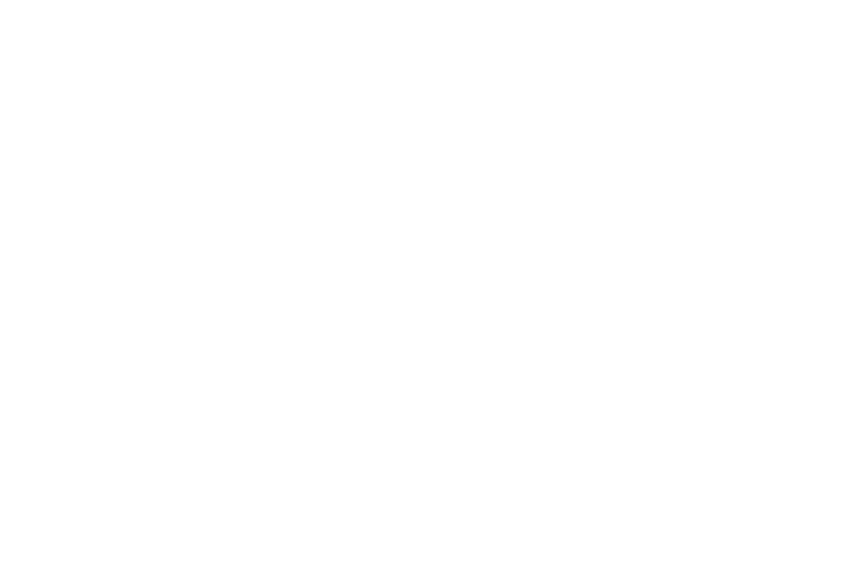

<IPython.core.display.Javascript object>


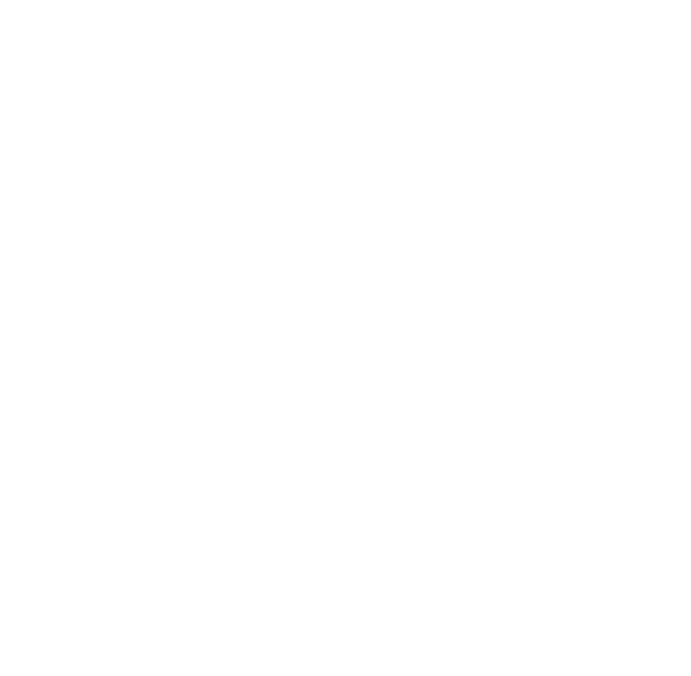

<IPython.core.display.Javascript object>


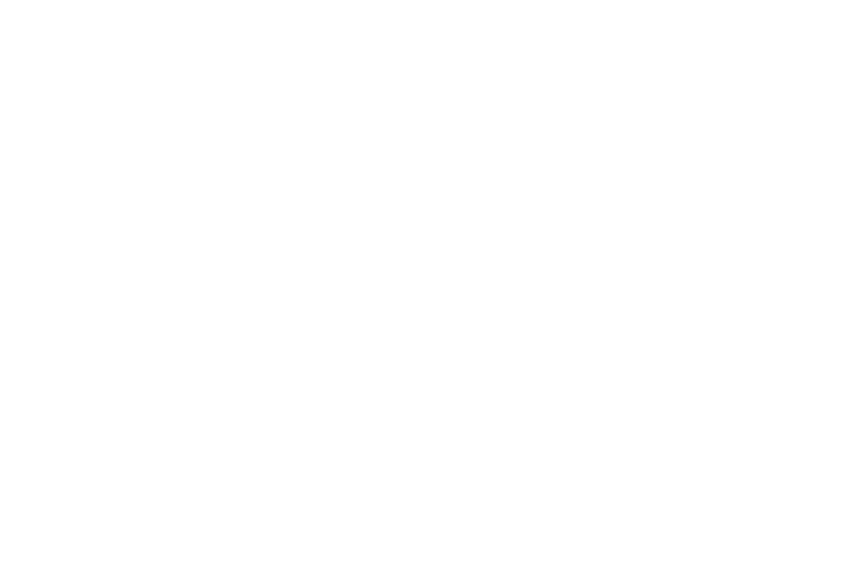

<IPython.core.display.Javascript object>


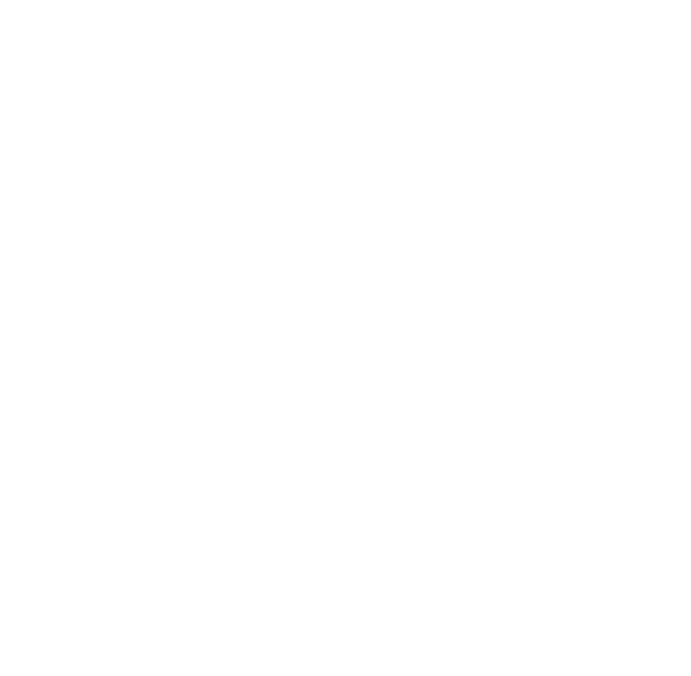

<IPython.core.display.Javascript object>


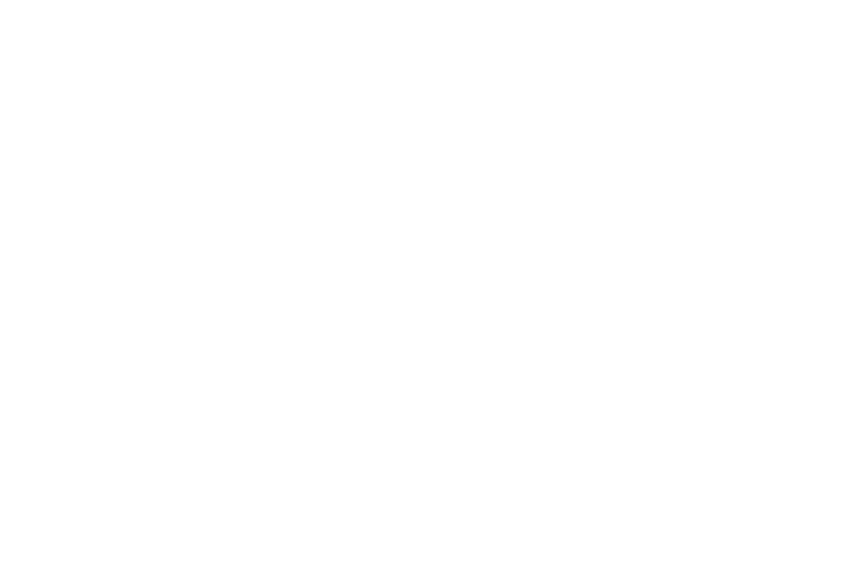

<IPython.core.display.Javascript object>


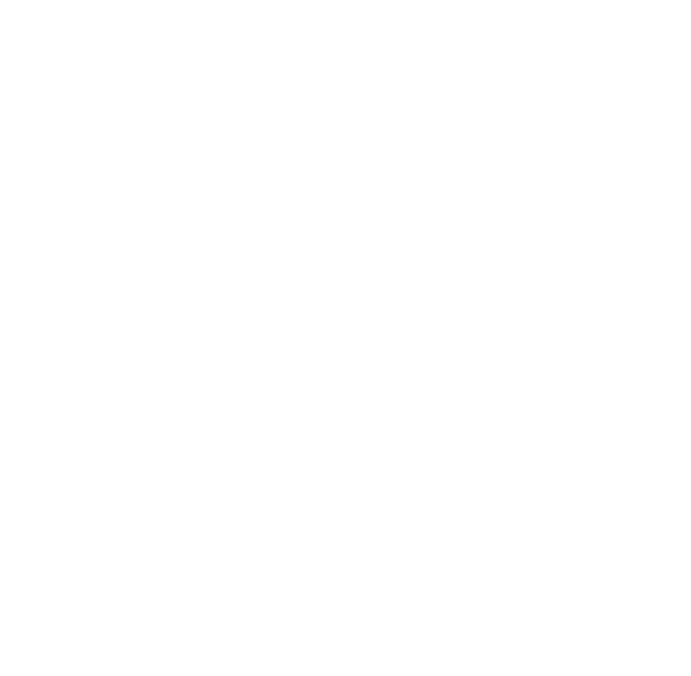

<IPython.core.display.Javascript object>


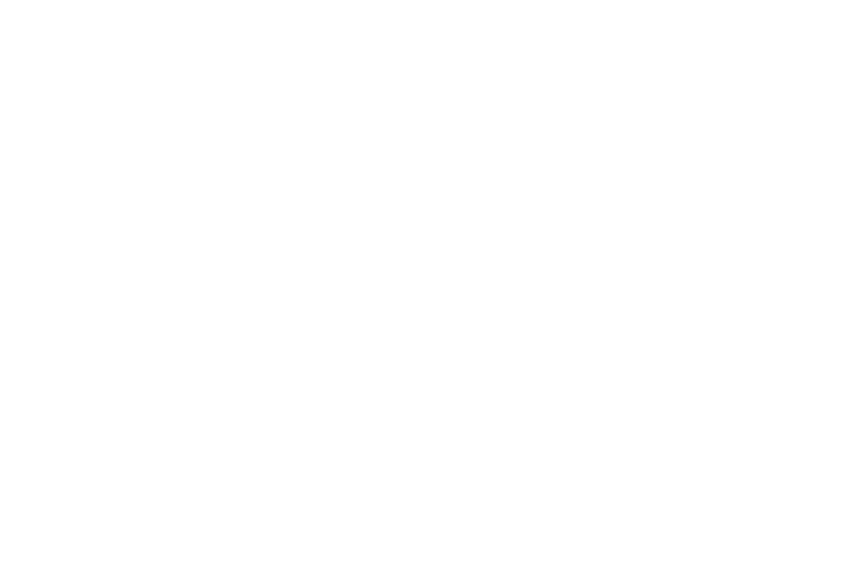

<IPython.core.display.Javascript object>


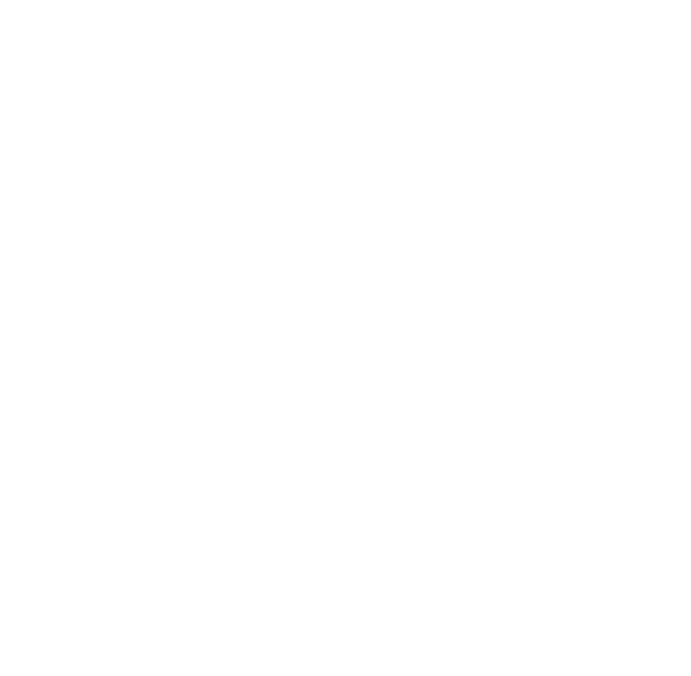

<IPython.core.display.Javascript object>


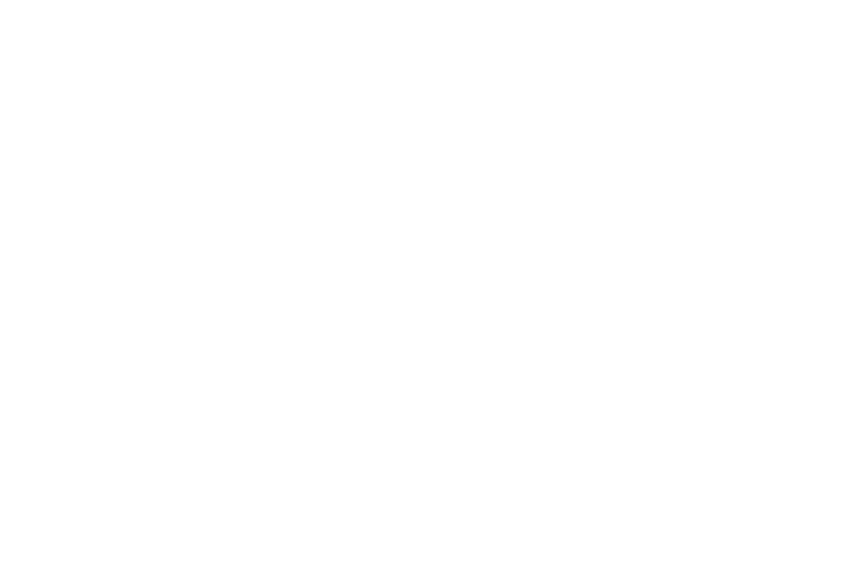

<IPython.core.display.Javascript object>


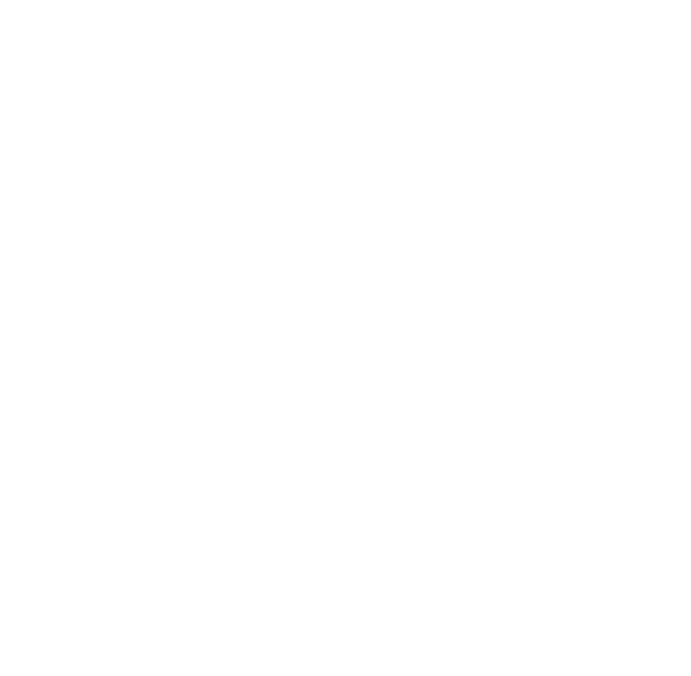

<IPython.core.display.Javascript object>


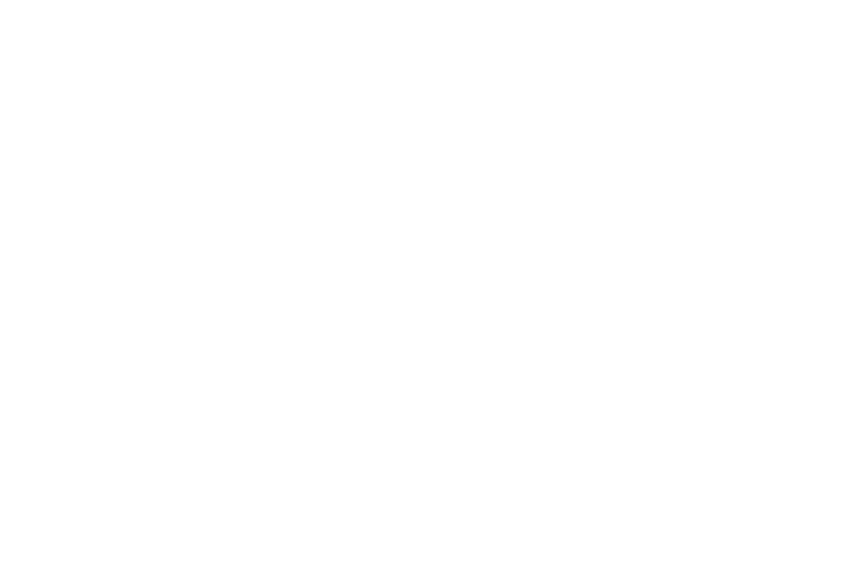

<IPython.core.display.Javascript object>


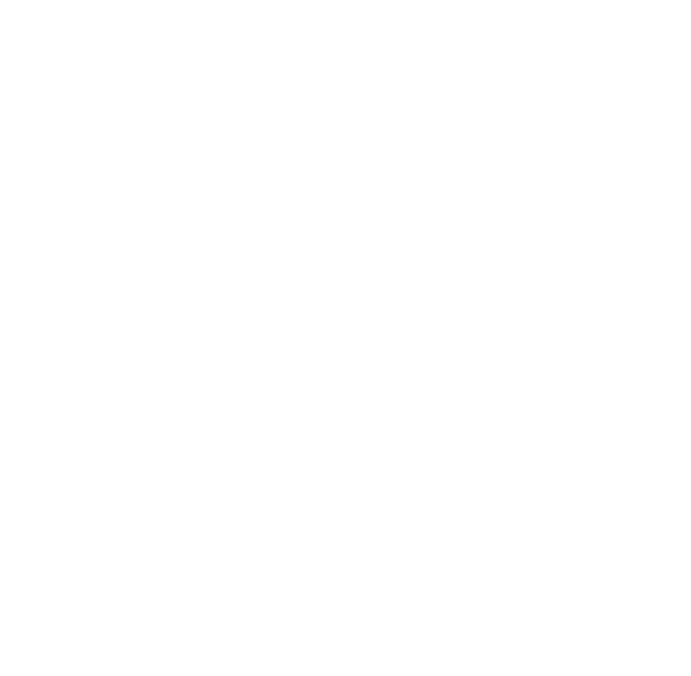

<IPython.core.display.Javascript object>


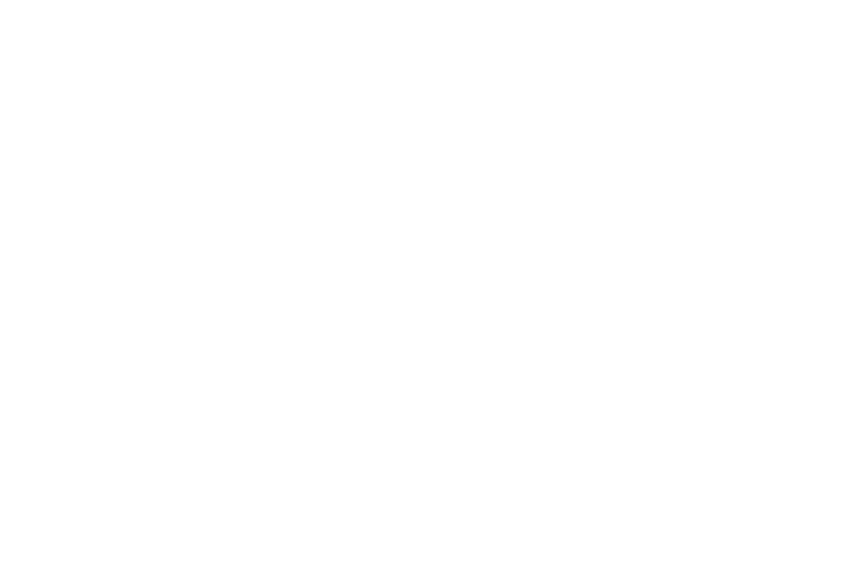

<IPython.core.display.Javascript object>


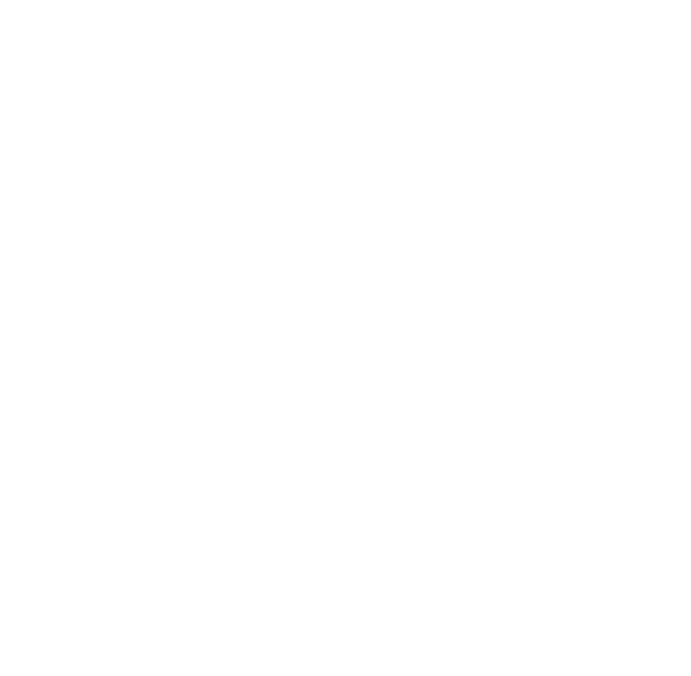

<IPython.core.display.Javascript object>


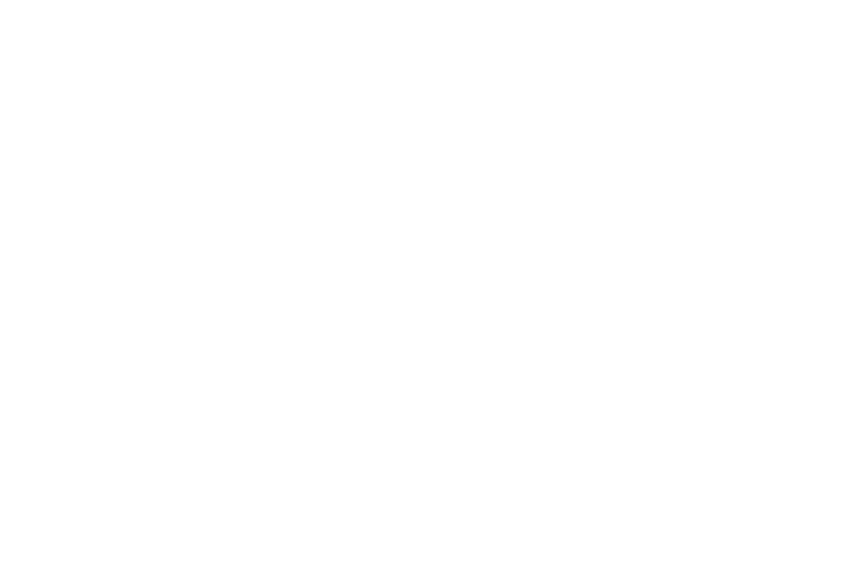

<IPython.core.display.Javascript object>


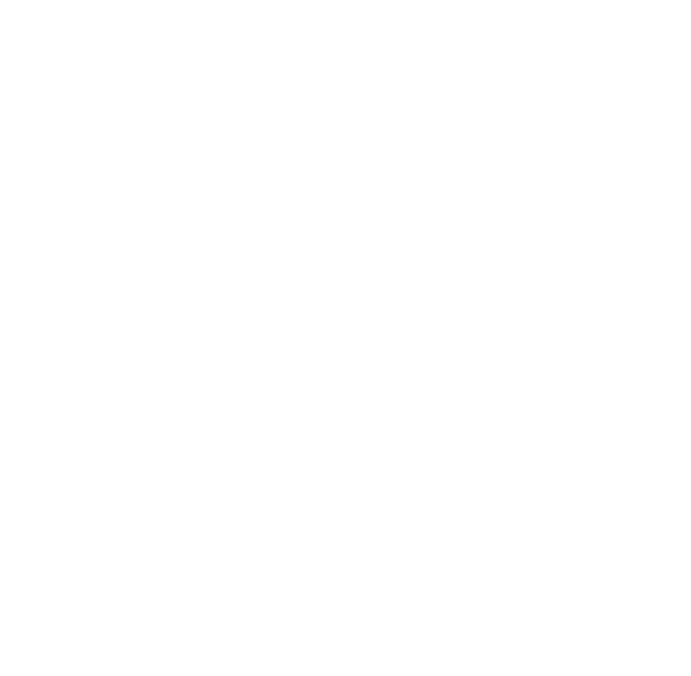

<IPython.core.display.Javascript object>


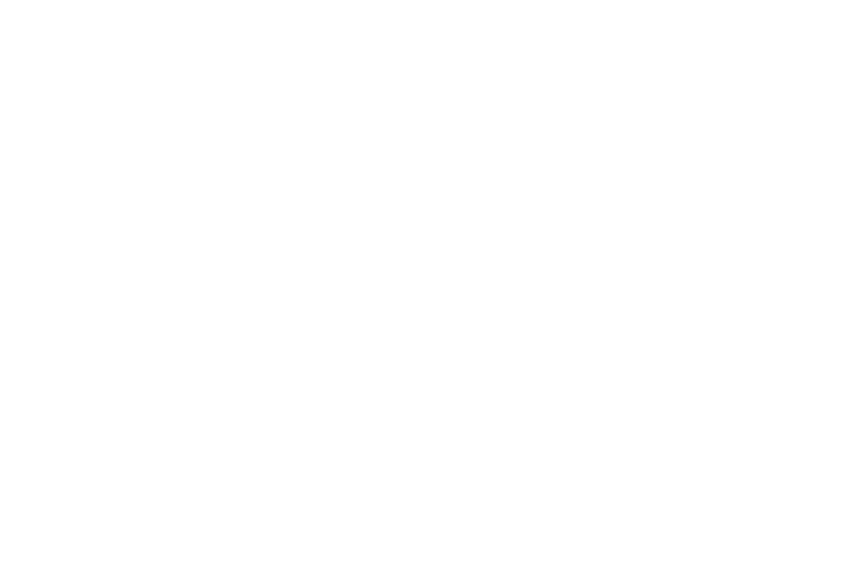

<IPython.core.display.Javascript object>


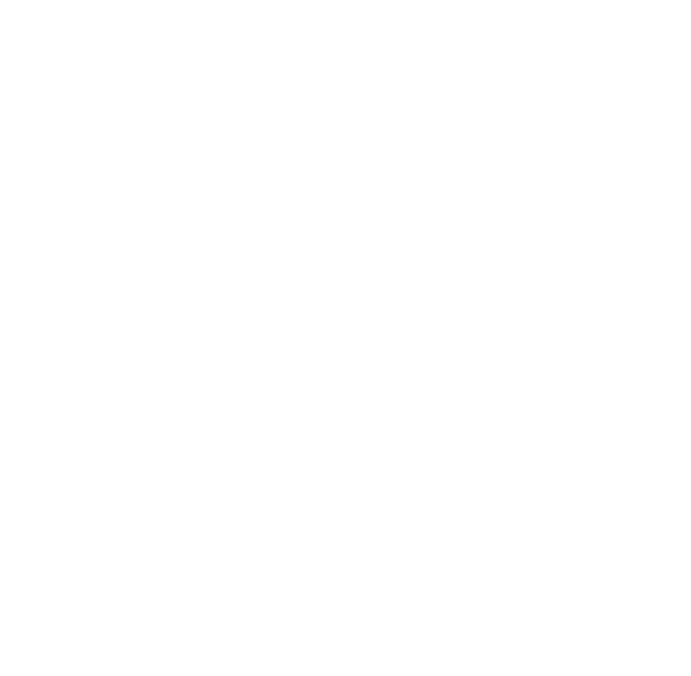

<IPython.core.display.Javascript object>


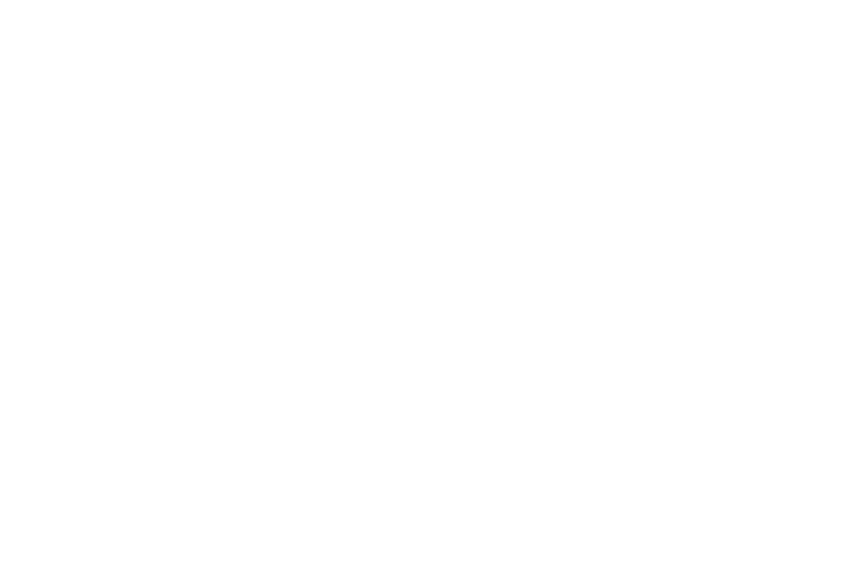

<IPython.core.display.Javascript object>


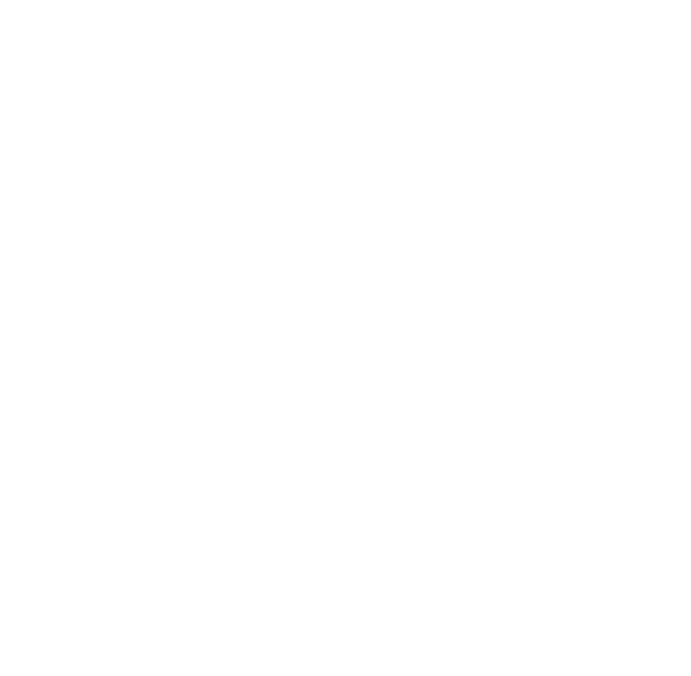

<IPython.core.display.Javascript object>


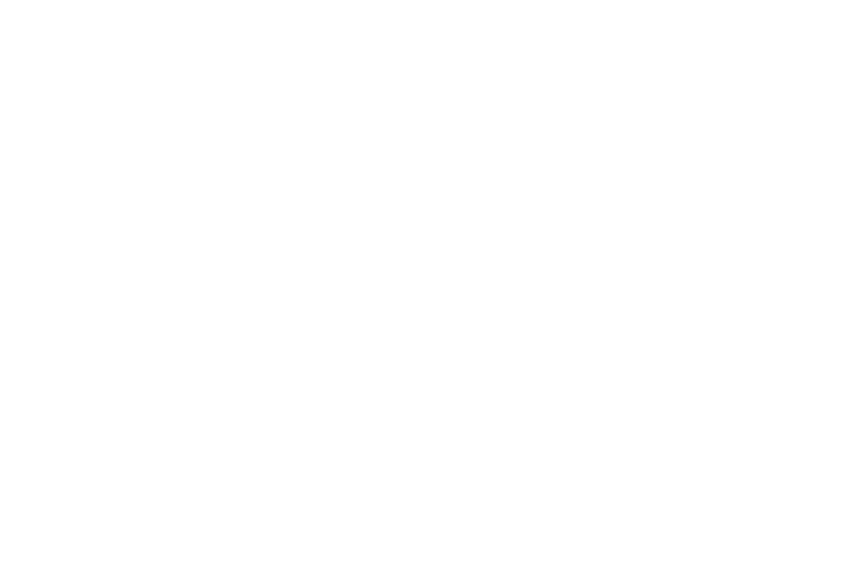

<IPython.core.display.Javascript object>


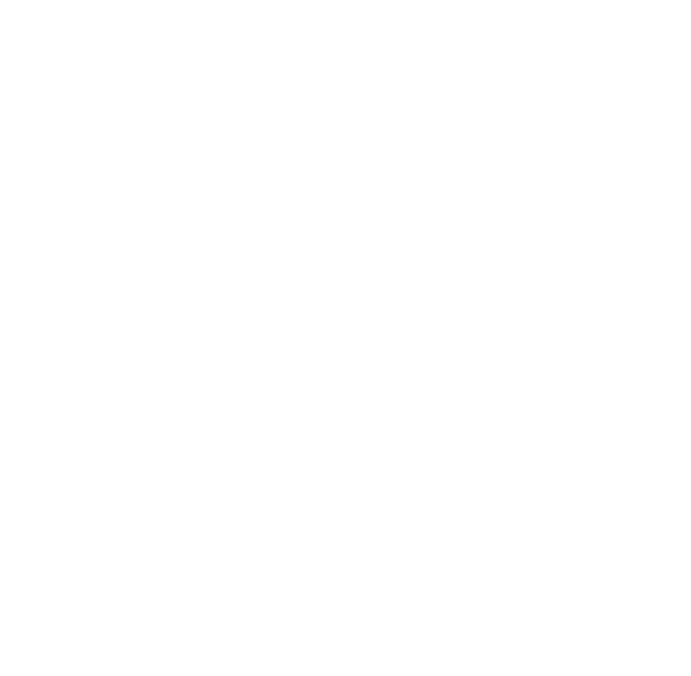

<IPython.core.display.Javascript object>


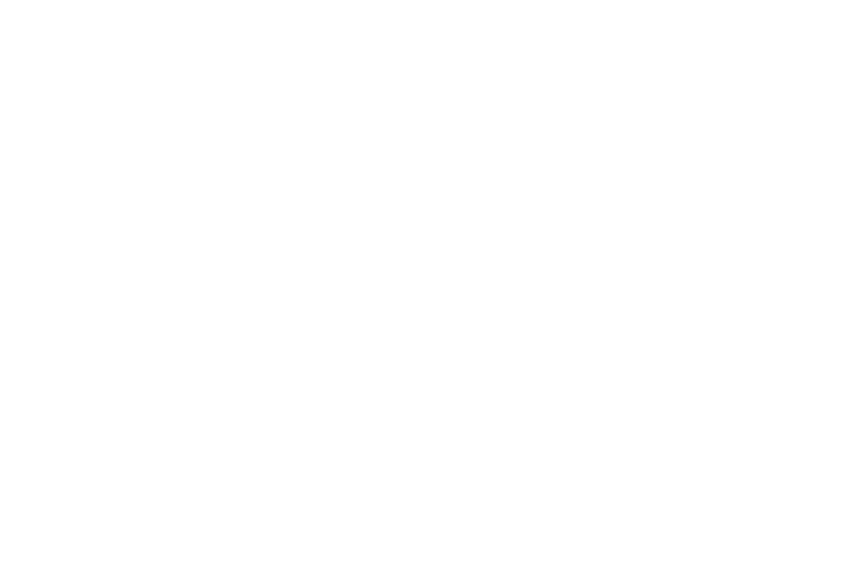

<IPython.core.display.Javascript object>


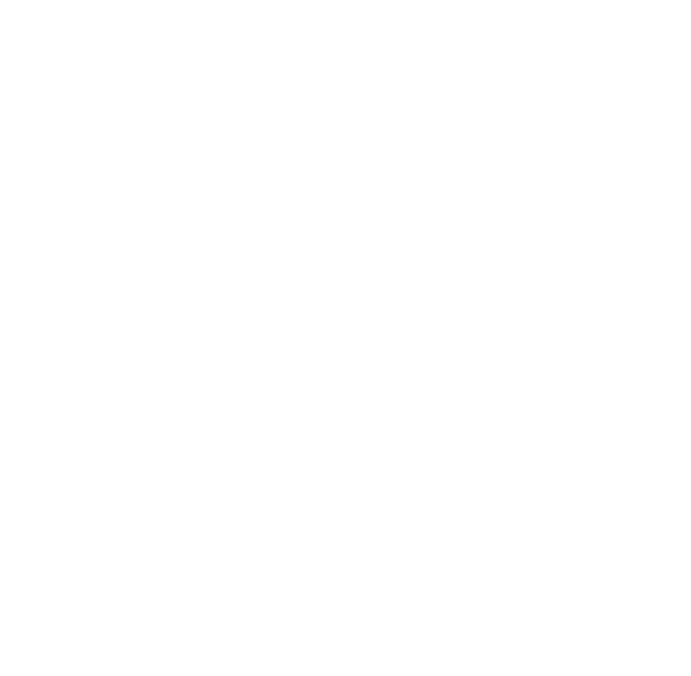

<IPython.core.display.Javascript object>


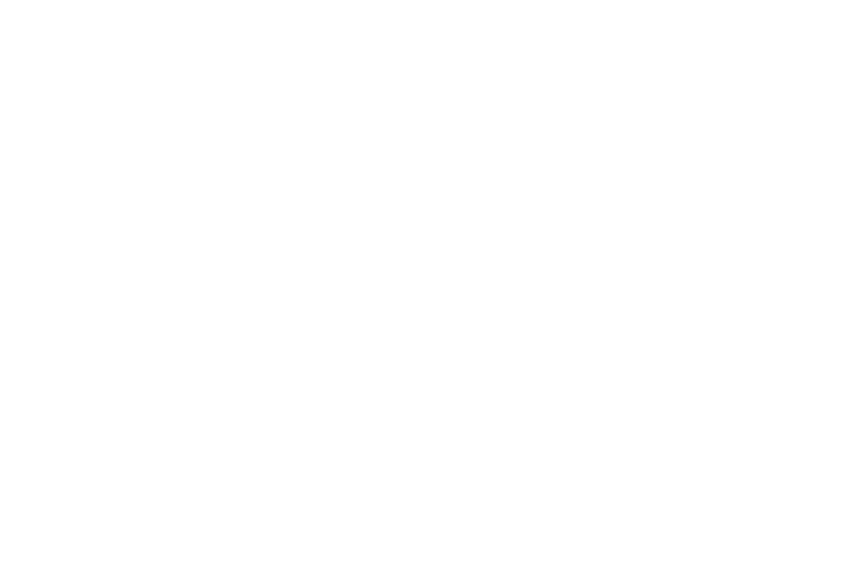

<IPython.core.display.Javascript object>


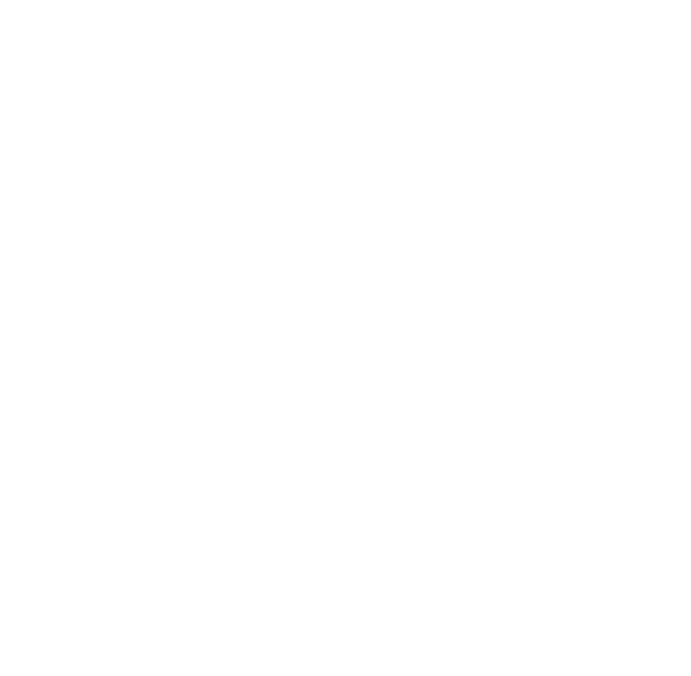

<IPython.core.display.Javascript object>


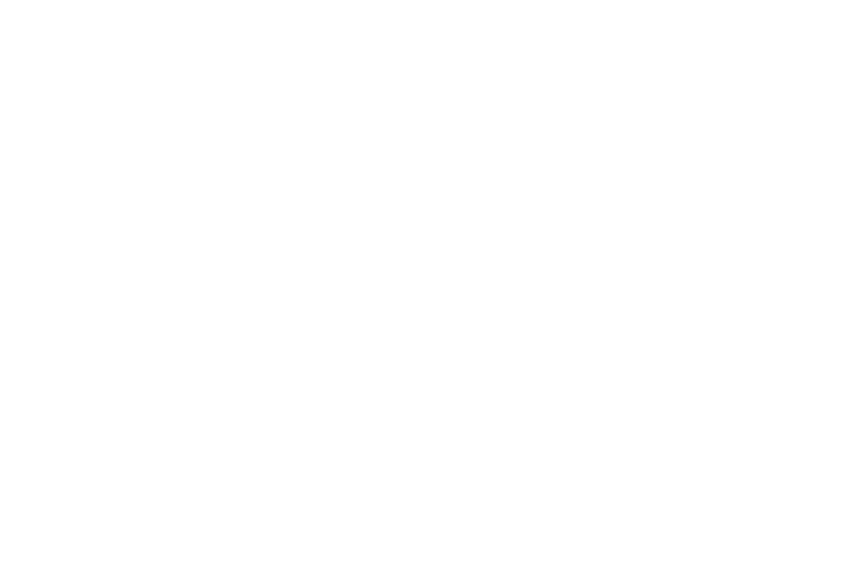

<IPython.core.display.Javascript object>


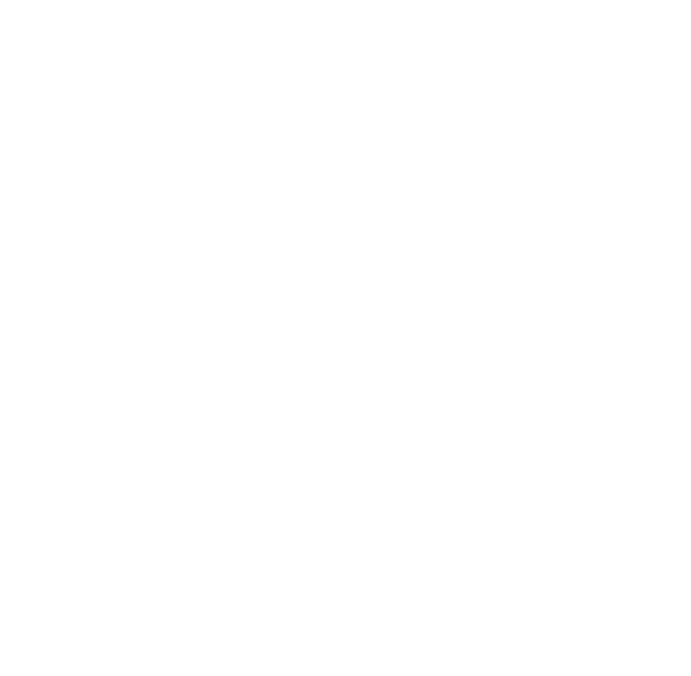

<IPython.core.display.Javascript object>


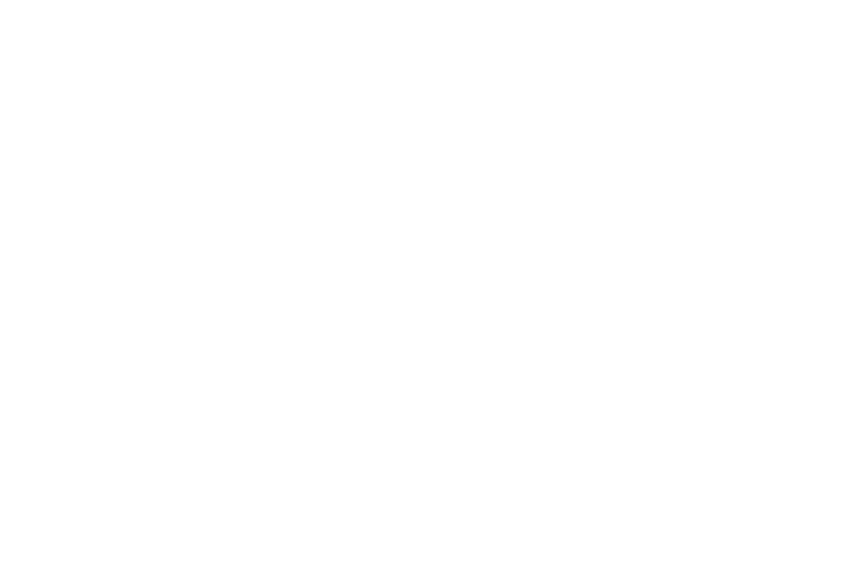

<IPython.core.display.Javascript object>


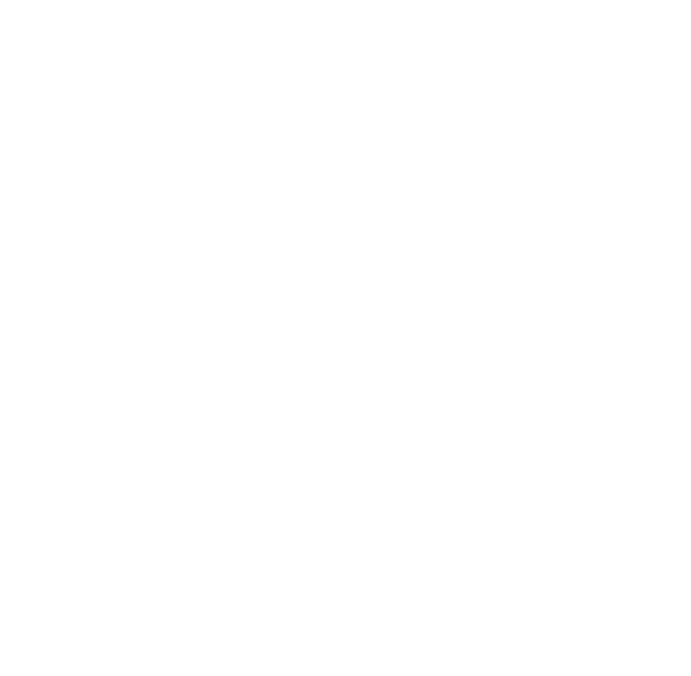

<IPython.core.display.Javascript object>


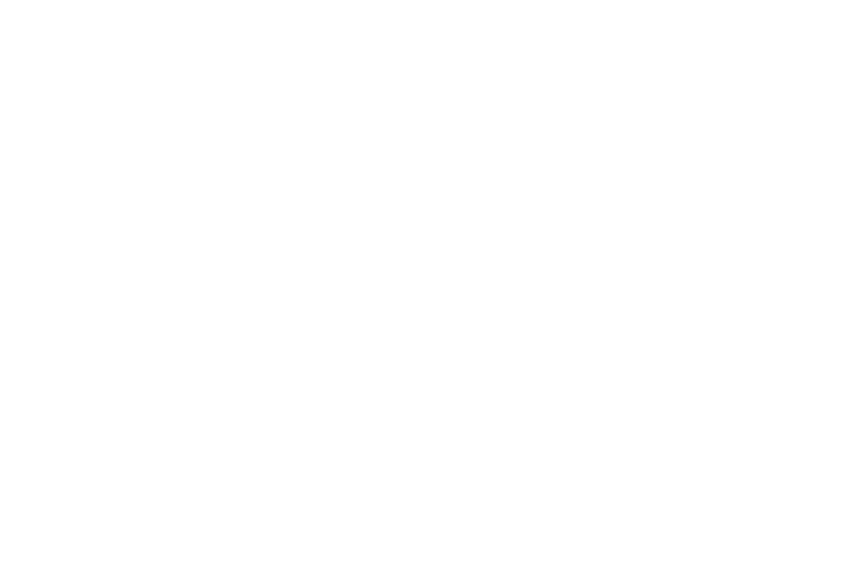

<IPython.core.display.Javascript object>


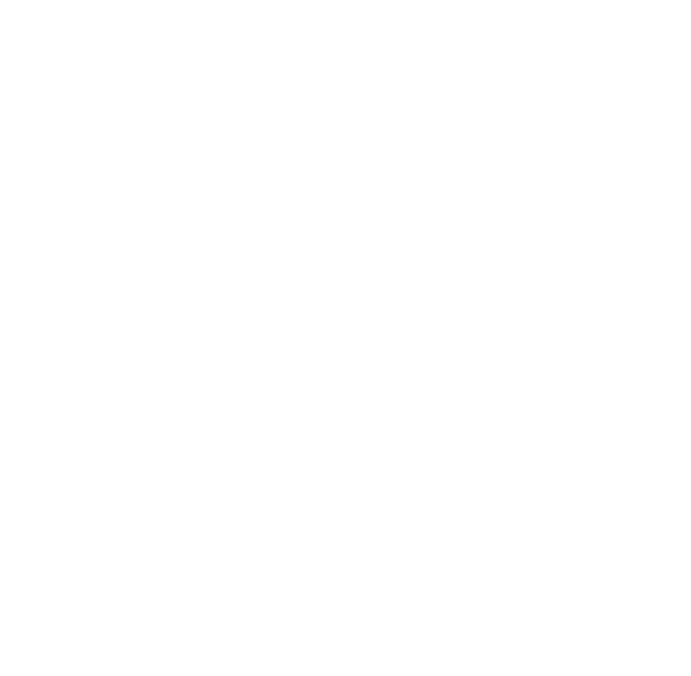

<IPython.core.display.Javascript object>


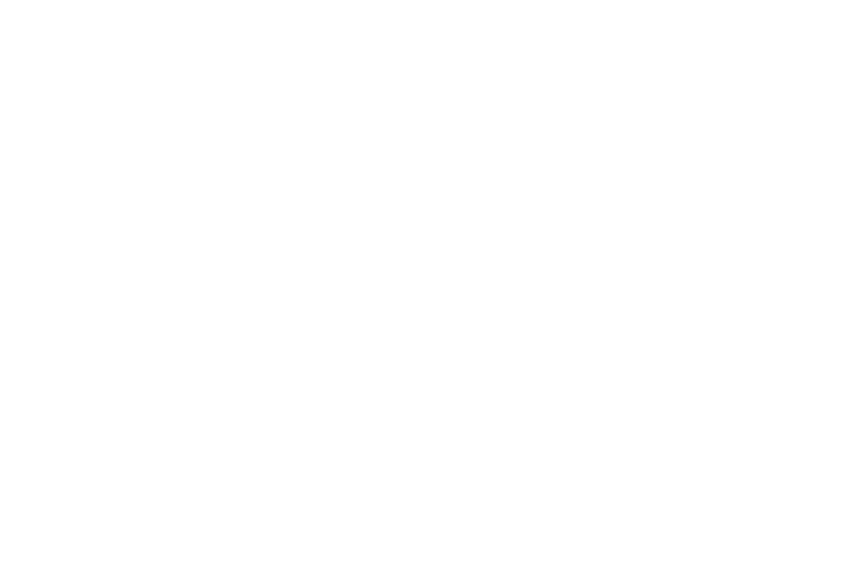

<IPython.core.display.Javascript object>


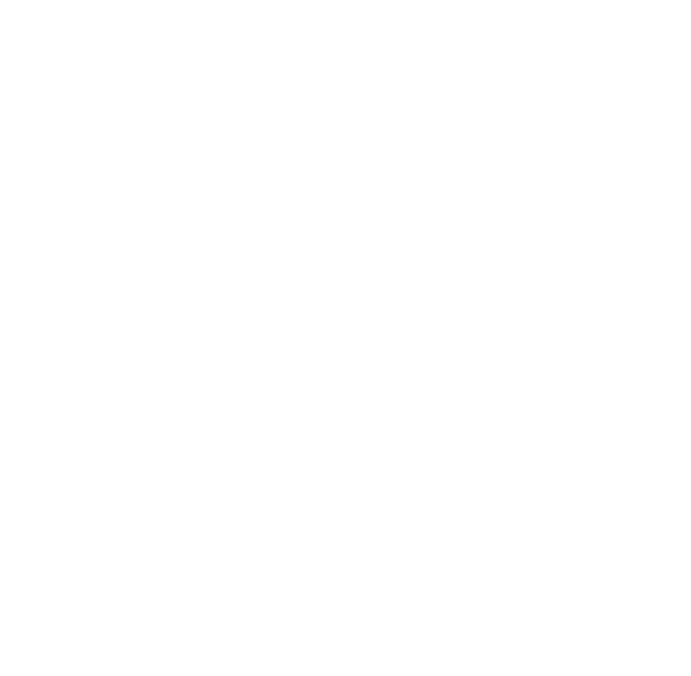

<IPython.core.display.Javascript object>


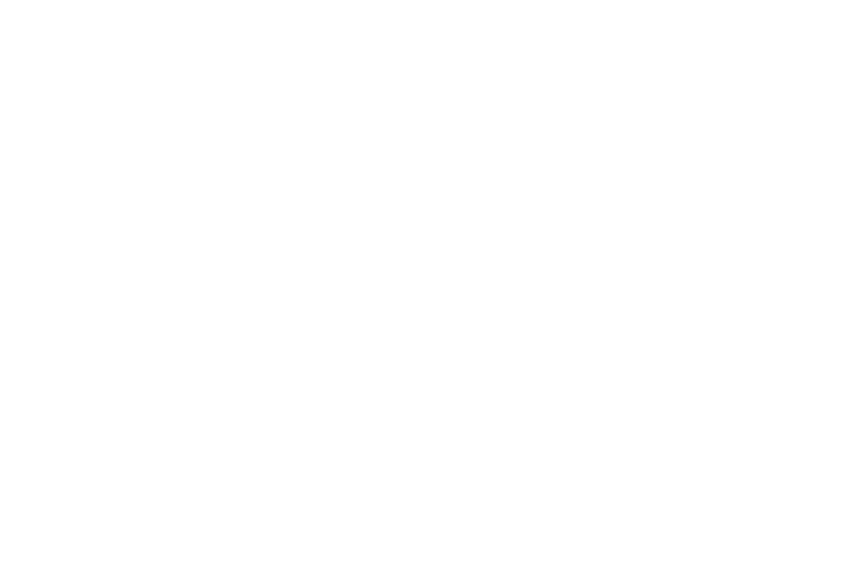

<IPython.core.display.Javascript object>


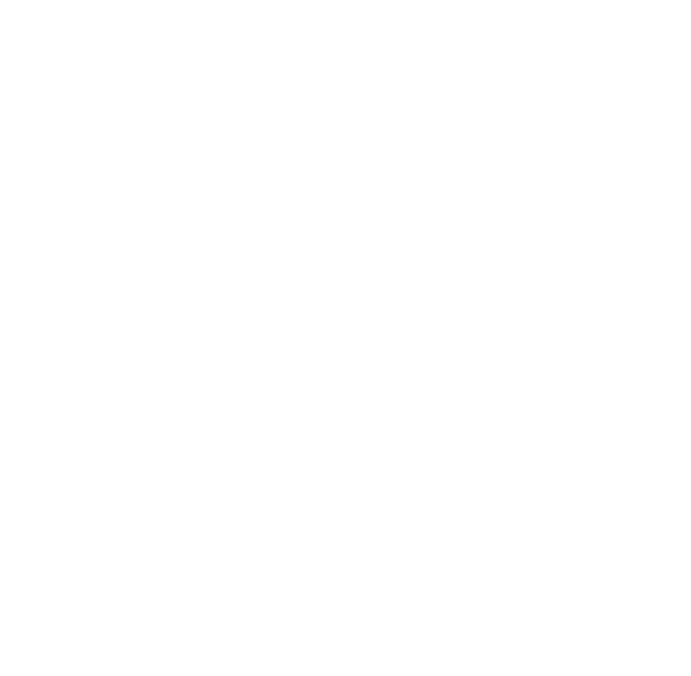

<IPython.core.display.Javascript object>


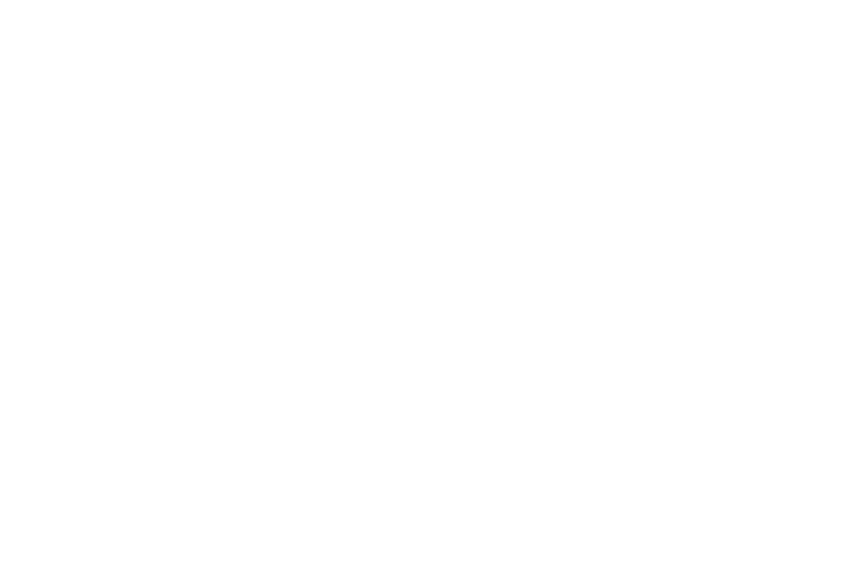

<IPython.core.display.Javascript object>


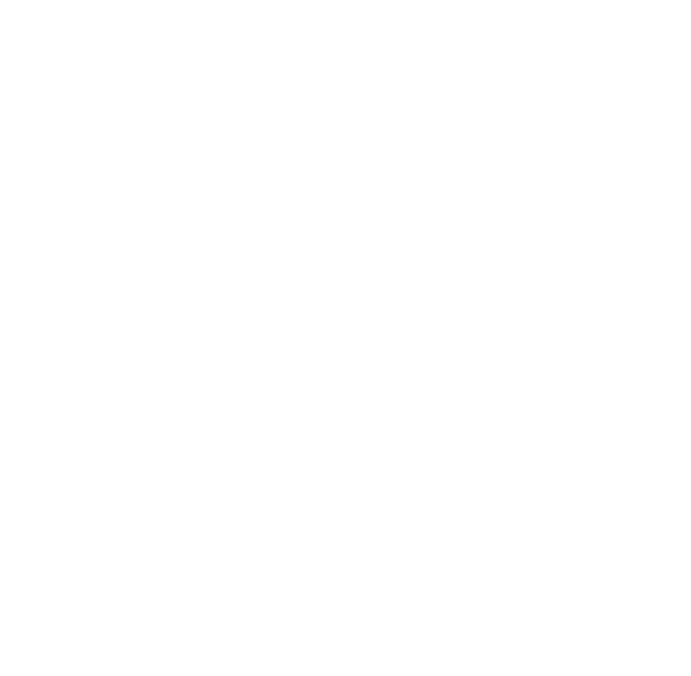

<IPython.core.display.Javascript object>


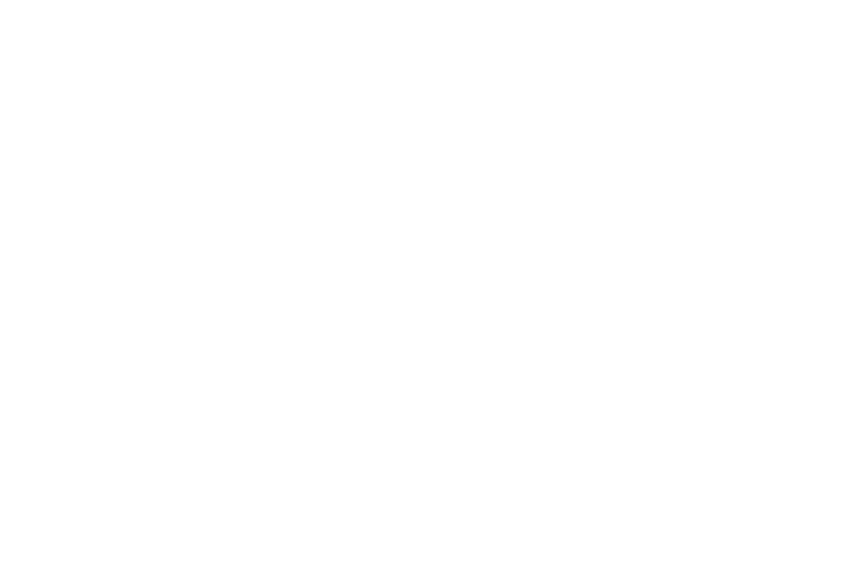

<IPython.core.display.Javascript object>


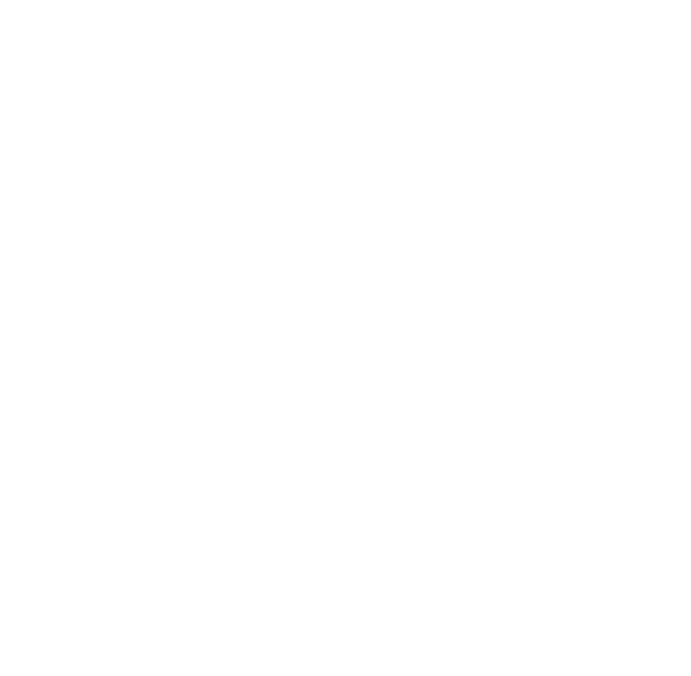

New video was added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\1035 SI_A, Aug 15, 13 17 7 rotated.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.


In [16]:
deeplabcut.extract_outlier_frames(path_config_file,['1035 SI_A, Aug 15, 13 17 7 rotated.mp4'])

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset.

In [ ]:
%gui wx
deeplabcut.refine_labels(path_config_file)

Linux
Checking labels if they are outside the image
A training dataset file is already found for this video. The refined machine labels are merged to this data!
Closing... The refined labels are stored in a subdirectory under labeled-data. Use the function 'merge_datasets' to augment the training dataset, and then re-train a network using create_training_dataset followed by train_network!


In [5]:
#Once all folders are relabeled, check them and advance. See how to check labels, above!
deeplabcut.merge_datasets(path_config_file)

Merged data sets and updated refinement iteration to 1.
Now you can create a new training set for the expanded annotated images (use create_training_dataset).


## Create a new iteration of training dataset [optional step]
Following the refine labels, append these frames to the original dataset to create a new iteration of training dataset.

In [6]:
deeplabcut.create_training_dataset(path_config_file)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


## Create labeled video
This funtion is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

In [11]:
deeplabcut.create_labeled_video(path_config_file,videofile_path, videotype = "mp4")

  1%|          | 28/3221 [00:00<00:11, 278.21it/s]

Starting %  . ['1035 SI_A, Aug 15, 13 17 7 rotated.mp4']
Loading  1035 SI_A, Aug 15, 13 17 7 rotated.mp4 and data.
False 0 480 0 470
3221
Duration of video [s]:  161.05 , recorded with  20.0 fps!
Overall # of frames:  3221 with cropped frame dimensions:  480 470
Generating frames and creating video.


100%|██████████| 3221/3221 [00:12<00:00, 251.64it/s]


## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [ ]:
%matplotlib notebook #for making interactive plots.
deeplabcut.plot_trajectories(path_config_file,videofile_path)